# Overview


Objective: The objective is to predict the occurrence of car failure using the provided dataset for an automotive
company to formulate mitigative policies. 

To this end, we shall perform the following in this notebook:

- preliminary exploratory data analysis, 
- deliberation and choice of evaluation metric(s),
- data processing, feature engineering,
- univariate exploratory analysis and hypothesis testing for feature variables against the target variables, 
- bivariate correlation analysis for pairs of feature and target variables, 
- imbalanced dataset treatment,
- train at least 3 suitable machine learning classification models for predicting car failure in each of the 2 categories of classification, namely:
    -   `Category I: Binary Class` - `Has Failure` (2 classes) : 
        -   `0` : negative class as non-faulty, 
        -   `1` : positive class as faulty.
    -   `Category II: Multi-class` - `Failure_Type` (6 classes): 
        -   `0` : None, 
        -   `1`-`5`  : A-E, 
- evaluate the performance of these models for Category I, II car failure classifications,
- analyse key features that are indicative of car failure and various types of car failure.

# Results Summary

For `Category I: Binary Class` - `Has Failure`, the top 3 groups of feature importances derived from SHAP analysis of the top model (XGBoost) are as follows:

1. `Membership = None`: Cars owned by non-members have a strong tendency to impact the trained model's classification of cars in the test dataset as having faults, relative to cars owned by members. 

2. `Fuel Consumption`: Cars with higher fuel consumption tend to influence the trained model to classify cars in the test dataset as having faults, compared to cars with lower fuel consumption.

3. `Model` 
    -   (a) `Model Year`: Newer cars appear to affect the trained model's classification of cars in the test dataset as having no faults, with about 70% of newer cars having this impact, compared to older cars. However, a small proportion of older cars, less than 30%, seem to influence the model to classify cars as having faults.
    -   (b) `Model No=3`: Cars of Model No. 3 seem to attribute more strongly to the trained model's classification of cars in the test dataset as having faults, compared to cars of other models.



For `Category II: Multi-class` - `Failure_Type`, for each class, the top 3 groups of feature importances derived from SHAP analysis of the top model (XGBoost) are as follows: 


- Class 0 (Failure Type A):
    1. `Model Year`
    2. `Membership=None`
    3. `RPM`

- Class 1 (Failure Type B):
    1. `Fuel consumption`
    2. `Model Year`
    3. `RPM`


- Class 2 (Failure Type C):
    1. `Temperature`
    2. `Model Year`
    3. `RPM`

- Class 3 (Failure Type D):
    1. `Model Year`
    2. `Fuel consumption`
    3. `RPM`

- Class 4 (Failure Type E):
    1. `RPM`
    2. `Model Year`
    3. `Fuel consumption`

- Class 5 (No-failure):
    1. `Membership=None`
    2. `Fuel consumption`
    3. `Model No=3`, `Model Year`

Again, we find the correlated factors of either `Membership=None` and/or  `Model Year` appear in all fault type classes. The reader can refer to subsection 7.3 and 8.3 for more details of the analyses obtained using the SHAP package, and as well as our recommendations based on the findings.

# Summary of EDA Findings from Car Failure Dataset


The dataset contains the specifications of the cars as well as parameters measured by the car sensors. The dataset contains the specifications of the cars as well as parameters measured by the car sensors.

Based on the exploratory data analysis (EDA) to come, we start with an summarised overview of our EDA findings about each of these attributes/column vectors, and whether their association with target variables are of statistical significance. The details of the EDA findings in each attributes and their associations with the target variables are given in the subsections within Section 1.

|Attribute |Description|Findings|Target Variable Assocation|
|-----|-----|-----|-----|
|`Car ID`|Car unique ID|10,000 & 80 non-duplicate and duplicate rows, the duplicate rows are dropped. This attribute shall be dropped as it contains 10,000 unique string values which do not seem to have any apparent patterns/subgroups for feature engineering|Invalid |
|`Model`| Its column vector values are in the format 'Model Year, Model No.', where 'Model Year' ranges over 14 years from 2009-2022, and ''Model No.' take on values 3, 5, and 7 (in the order of increasing specifications). We can split this column into two columns 'Model Year, Model No.' as features|Values within the 'Model Year' column vector are generally equally distributed except for years 2009-2011, and 2022, whereas the values within 'Model No.' vector take on 3,5,7 with ratio $\approx$ 6:3:1.  | Failure Types: `A`, `D`, `Non-failure`.|
|`Color`| Color of the car: White (W), Red (R), Blue(Blu), Grey(G), Black(Blk)  |W:R:B:G:Blu:Blk ratio $\approx$ 5:1:1:1:1. |Failure Types: None |
|`Temperature` | Average 30 days temperature of the car engine before failure detected|Contains a mixture of °F and °C unit string readings that are standardised to float values (in terms of Celcius °C), cluster analysis yields 2 clusters (potential new feature): 110-112(°C) & 112-231(°C) with ratio $\approx$ 6:4. | Failure Types: `C`, `Has-Failure`|
|`RPM` |Average 30 days maximum torque speed at maximum torque before failure detected|Cluster analysis yields clusters (potential new feature) RPM=-2636-0:RPM=0-1445:RPM=1565-2886:RPM=1445-1565 ratio $\approx$  2:33:33:33.| Failure Types: `A`, `C`, `Has_Failure`|
|`Factory`|Manufacturing origin of the car in the format 'Country, City'|Post-data processing of a small proportion (2.2%) of inconsistent 'Country, City' entries yields factory groups Shanghai:Berlin:New York in the ratio $\approx$ 56:22:22.| Failure Types:  `Has_Failure`|
|`Usage`|Owner usage frequency of the car|Equally distributed in High, Medium, Low usage groups|Failure Types:  `All` |
|`Fuel consumption`|Fuel consumption of the car in Litre per kilometre|Cluster analysis yields  nearly equally sized clusters (potential new feature) 598-650, 650-687, 687-905 Litre per kilometre groups| Failure Types:  `All` except `A`.|
|`Membership`| Type of membership subscripted by the car owner with the automotive company. “Normal” membership offers subscribers two complimentary car servicing per year. “Premium” membership offers subscribers unlimited car servicing. Car owners are automatically subscribed with “Normal” membership for the first five years after car purchase. Analysis reveals that this column vector contains 383 (3.8%) null values, which analysis reveals all of them correspond to 5 years or less ownership (inferred from 'Model Year'), and thus these null values are replaced by “Normal” based on the context in the description.| Post-data processing reveals the ratio of 'Membership' groups as Normal:Premium:None $\approx$ 47:34:19.|Failure Types:  `All`|
|`Failure A`| A type of car failure: “0” = Corresponding fault not identified, “1” = Corresponding fault identified|3.10% of full dataset labels |To be used as target variable|
|`Failure B`| A type of car failure: “0” = Corresponding fault not identified, “1” = Corresponding fault identified|2.64% of full dataset labels  |To be used as target variable|
|`Failure C`|A type of car failure: “0” = Corresponding fault not identified, “1” = Corresponding fault identified| 2.59% of full dataset labels | To be used as target variable| 
|`Failure D`|A type of car failure: “0” = Corresponding fault not identified, “1” = Corresponding fault identified|2.44% of full dataset labels  |To be used as target variable|
|`Failure E`|A type of car failure: “0” = Corresponding fault not identified, “1” = Corresponding fault identified|1.85% of full dataset labels  |To be used as target variable|




New Features & Target Variables for model training

New target variables and potential features are created in the following to ease analysis for the case of binary and multi-class classification later.

|Target Variable |Description|
|-----|-----|
|`Has_Failure`|No car failure = “`0`”, Car failure identified = “`1`” = Car fault identified (for Category I binary classification)|
|`Failure_Type`|Encoding Labels: `0`-`4` = Car Failure Types A-E respectively & `5` = No Car failure (for Category II multi-classification)|

With feature engineering to be described in detail in subsection, we can create the following as potential new features: 

|Potential New Features|Description|
|-----|-----|
|`Model No`|Ordinal variable with Model No groups listed in increasing rank order: `3, 5, ...,7`|
|`Model Year`|Ordinal variable with Model Year groups listed in increasing rank order: `2009, 2010, ...,2021, 2022`|
|`RPM_grp`|Ordinal variable with RPM groups listed in increasing rank order: `-2636-0`, `0-1445`, `1445-1565`, `1565-2886` |
|`Fuel_grp`|Ordinal variable with fuel consumption groups listed in increasing rank order: `598-650`, `650-687`, `687-905` (Litre per kilometre)|
|`Temp_grp`|Ordinal variable with temperature groups listed in increasing rank order: `110-112`  `112-231` (°C)|


# Data Acquistion from Databases

We first perform a setup of environmental variables to access a AWS S3 bucket for the purposes of data transformation and machine learning model training and inference, which require data persistence.

We then execute data queries and acquistion from the online database `failure.db` using the `requests` and `sqlite3` packages to convert the sql queries into a pandas dataframe `df` for subsequent exploratory data analysis and data wrangling.

In [212]:
import boto3
import dotenv
import os
from io import StringIO
import tempfile
from dotenv import load_dotenv

# Using python-dotenv / boto3 to retrieve AWS S3 Bucket keys 
# from environmental variables stored locally / Github Actions Secret in remote repo
# Github Actions version to read and write files from/to AWS S3 Bucket, 
AWS_ACCESS_KEY_ID = os.environ.get('AWS_ACCESS_KEY_ID')
AWS_SECRET_ACCESS_KEY = os.environ.get('AWS_SECRET_ACCESS_KEY')
AWS_REGION = os.environ.get('AWS_REGION')
AWS_S3_BUCKET = os.environ.get('AWS_S3_BUCKET', 'default_bucket_name')

if not all([AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY, AWS_REGION, AWS_S3_BUCKET]):
    try:
        load_dotenv() 
        AWS_ACCESS_KEY_ID = os.environ.get('AWS_ACCESS_KEY_ID')
        AWS_SECRET_ACCESS_KEY = os.environ.get('AWS_SECRET_ACCESS_KEY')
        AWS_REGION = os.environ.get('AWS_REGION')
        AWS_S3_BUCKET = os.environ.get('AWS_S3_BUCKET', 'default_bucket_name')
    except:
        raise ValueError('AWS credentials are missing')
    
s3 = boto3.resource(
    service_name='s3',
    region_name=AWS_REGION,
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY
)

In [213]:
import sqlite3
import requests
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

# Retrieve SQL query from the online database file to convert it into pandas dataframe
file_url = 'https://techassessment.blob.core.windows.net/aiap13-assessment-data/failure.db'
response = requests.get(file_url)
with open('./data/failure.db', 'wb') as f:
    f.write(response.content)
    
# Connect to the local database
conn = sqlite3.connect('./data/failure.db')
cursor = conn.cursor()
# Execute an SQL INSERT query
query = "SELECT * FROM failure"

dfs = []
# Execute SQL SELECT queries and store the results in chunks of smaller dataframes to avoid memory overload
for chunk_dataframe in pd.read_sql(query, conn, chunksize=1000):
    print(f"Got dataframe w/{len(chunk_dataframe)} rows")
    dfs.append(chunk_dataframe)
# Concatenating all dataframe chunks into a full dataframe
df = pd.concat(dfs)

# Close the cursor and connection
cursor.close()
conn.close()

# Sample the DataFrame
df.sample(2)

Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/81 rows


,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
135,b6b7c3d8-e8c3-4432-a7cd-dad56f86bfe6,"Model 3, 2015",White,110.1 °C,1535,"Berlin, Germany",High,655.5,None,0,0,0,0,0
187,a19a6ef1-35b3-4e87-b302-782ba1a0f96c,"Model 3, 2020",Grey,111.7 °C,1402,"Shang Hai, China",Low,615.8,Normal,0,0,0,0,0


# Outline of EDA Steps

Here we outline the overall thought process in performing EDA in the coming sections 1-5:
- preliminary data inspection, dropping any duplicate rows (especially in the ID column) and any column vectors with high proportion of missing values (>60%),
- analyze the distribution of target values (Failure Types) for presence of any class imbalance to ascertain whether oversampling techniques are required and determine an appropriate evaluation metric,
- throughly analyze each of the remaining feature column vectors (in subsections 1.3 - 1.10) by doing the following:
    - verifying each data type to be eventually used to be either a float, categorical, or ordinal variable, and whether any data processing or feature engineering should be employed,
    - visualizing the class distribution of values in each of the categorical/ordinal variables to detect any potential trends/interesting patterns to be further analyzed with chi-square hypothesis testing,
    - checking the spread of values in each of the continuous variables, to see if binning would be appropriate via a clustering approach, which would be elaborated in subsection 1.11.
    - perform univariate analysis with respect to target variables to anticipate which potential features have a higher impact towards the target variables before performing machine learning classification.
    - identify groups of correlated features corresponding to potential top features that impact the target variables.


# 1.Data Processing, preliminary EDA & Feature Engineering


## 1.0. Preliminary Data inspection

We then do a preliminary inspection of the number of entries, type of data columns, and data types of the dataframe `df`, which reveals that it has currently has 10081 rows and 14 columns.

Interestingly, the column vector `Temperature` is currently encoded an object Dtype rather than a float64 DType, which suggests that we have to perform string processing later for float conversion. 


We identified that only the `Membership` column has about 3.8% missing values in its rows, so we shall elaborate on the treatment of these missing values later when analyzing the `Membership` feature column based on the problem context.

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10081 entries, 0 to 80
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10081 non-null  object 
 1   Model             10081 non-null  object 
 2   Color             10081 non-null  object 
 3   Temperature       10081 non-null  object 
 4   RPM               10081 non-null  int64  
 5   Factory           10081 non-null  object 
 6   Usage             10081 non-null  object 
 7   Fuel consumption  10081 non-null  float64
 8   Membership        9697 non-null   object 
 9   Failure A         10081 non-null  int64  
 10  Failure B         10081 non-null  int64  
 11  Failure C         10081 non-null  int64  
 12  Failure D         10081 non-null  int64  
 13  Failure E         10081 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.2+ MB


## 1.1. Car ID Column and check for column null-values

By inspecting the first column `Car_ID` by performing a .value_counts, we realize there are 81 duplicate rows. After performing drop row duplicates on the dataframe, we now have 10,000 unique rows in the dataset `df`.

We then drop `Car ID` column vector which has 10,000 unique values, since unlikely to get new info for machine learning.


We now check for null-values in each column of the resulting dataframe `df`, and there are no columns that have a large proportion of missing values (say >60%) to further discard and continue inspecting other columns.


In [215]:
df.drop_duplicates(inplace=True)
df.drop('Car ID', axis=1, inplace=True)
print(df.shape[0])
df.isna().sum() / len(df)

10000


Model               0.0000
Color               0.0000
Temperature         0.0000
RPM                 0.0000
Factory             0.0000
Usage               0.0000
Fuel consumption    0.0000
Membership          0.0383
Failure A           0.0000
Failure B           0.0000
Failure C           0.0000
Failure D           0.0000
Failure E           0.0000
dtype: float64

## 1.2. Target Variables (Failure Types A, B, C, D, E)

We first establish that this is not a multilabel classification problem, as our computation reveals that the sum of failures across types A-E is at most 1. 

Class imbalance, the proportions of Failure types can be taken as a baseline for classification performances in each class, namely

- Failure A: 2.59%
- Failure B: 1.85%
- Failure C: 3.10%
- Failure D: 2.44%
- Failure E: 2.64%
- No-Failure: 87.38%


From the relatively low proportions of failure type attributes within the given car measurements database, we can see that there is significant class imbalance with the minority classes of failure (12.5%) and each failure types (about 2.5% each) against the majority class (no faults 87.5%) 

Thus, the conventional metric of (overall) accuracy would not be a good evaluation metric to employ on the predictive performances of the trained models in this situation, because a dummy classifer (by always predicting the majority class as default) would yield a seemingly overall good classification rate of 87.5% but fail to detect any car failure.

In Section 5, we chose the f1-score (macro) as the evaluation metric as it balances the measures of recall and precision (as a harmonic mean). In this context, note that 

- Precision [for the binary positive class, as car failure detected] $$ Precision =  \frac{\text{Actual number of faulty cars selected by model}}{\text{Total number of cars predicted by the model to be faulty}}.$$

- Recall [for the binary positive class as car failure detected] $$ Recall =  \frac{\text{Actual number of faulty cars selected by model}}{\text{Total number of cars that are faulty}}.$$


Bcause of the above, in the context of car fault predictive detection, a car company would desire recall to be as large as possible to a maximum of 1.

On the other hand, as our experiments show, increasing recall comes at the expense of lowering precision as a tradeoff. 

A car company would not want precision to be too low in the context of car fault detection as the positive class because if precision is low, it means that there are a high number of false positives, which means that the car company would be identifying faults that do not actually exist. This would lead to unnecessary repairs, increased costs, and a decrease in customer satisfaction. 

Additionally, false positives can cause confusion for mechanics trying to diagnose and repair the car, further exacerbating the issue. 

Therefore, it is important for car companies to have balance precisio with recall in their car fault detection systems to ensure that only actual faults are identified and addressed. Thus, we have chosen the f1-score as our main evaluation metric to balance precision and recall for evaluating the performances of the machine learning predictive models.


On top of looking at the f1-score, we shall also consider the metrics of Kappa and Matthew correlation coefficient (MCC) within the sklearn classification report as additional references.

F1-score, Kappa, and MCC are all metrics used to evaluate the performance of a classification model. They each have their own strengths and weaknesses, and are suited for different types of classification tasks.

F1-score is the harmonic mean of precision and recall. It is a good metric to use when the classes are imbalanced, as it gives equal weight to false positives and false negatives.

Kappa is a measure of the agreement between two raters, and is often used in the field of medicine to evaluate the performance of diagnostic tests. It is a more robust metric than accuracy, as it takes into account the possibility of agreement occurring by chance.

MCC (Matthews correlation coefficient) is a measure of the correlation between predicted and actual class labels. It ranges from -1 to 1, with 1 indicating perfect prediction, 0 indicating random prediction, and -1 indicating perfect inverse prediction. It is a balanced metric, in that it considers both the true positives and true negatives as well as the false positives and false negatives. It is commonly used in bioinformatics.

In general, the choice of evaluation metric depends on the specific use case and the types of errors that are most important to avoid. In most cases F1-score is a good choice, but if the class imbalance is severe, MCC can be more informative. In some cases Kappa is used as an evaluation metric when there are multiple raters and you want to account for the chance agreement.

In [216]:
# Define 'No-Failure' column variable for ease of EDA
target_vars = ['Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E']
df['No-Failure'] = 1 - df[target_vars].sum(axis=1)

# Convert dummy variables to categorical variable for ease of EDA
target_vars = ['No-Failure'] + target_vars
df['Failure_Type'] = df[target_vars].idxmax(axis=1, skipna=False)

mapping = {
    'No-Failure': 'Nil', 
    'Failure A': 'A', 
    'Failure B': 'B', 
    'Failure C': 'C',
    'Failure D': 'D',
    'Failure E': 'E' }

df['Failure_Type'] = df['Failure_Type'].replace(mapping)

print(df['Failure_Type'].value_counts()/len(df))

Nil    0.8738
C      0.0310
E      0.0264
A      0.0259
D      0.0244
B      0.0185
Name: Failure_Type, dtype: float64


## 1.3. Feature - Model 

`Model [categorical variable]`

is in the form (Model No, Model Year), perform feature engineering to create 2 new feature columns to used, namely 
 
- `Model No` (ordinal): 3,5,7 in the order of increasing specification,
- `Model Year`: (ordinal): 2009, 2010, ..., 2020  in the order of increasing years


For convenience, we will also define a temporary variable named:

`Years of Usage` (ordinal): 15, 14, ..., 3, 2 in reverse order, 
obtained by taking `Years of Usage` = 2023 - `Model Year` + 1.

We then exclude `Model`, `Years of Usage`  column vectors as feature vectors for model training after the univariate EDA.

Upon inspection of the distributions of `Model No` , and `Model Year`, it appears that there is Model No. 3 is the majority class of 60% among the other model numbers, whereas the cars are rather evenly distributed among the 14 model years except for years 2009-2011, 2022.

In [217]:
# Splitting the 'Model' column into 2 new columns 'Model No', 'Model Year'
df[['Model No', 'Model Year']] = df['Model'].str.split(', ', expand=True)
df['Model No'] = df['Model No'].str.replace('Model ', '')

# Drop 'Model' column 
df.drop('Model', axis=1, inplace=True)

# Create temporary column for EDA purposes to be discarded
df['Model Year'] = df['Model Year'].astype(int)
df['Years of Usage'] = 2023 - df['Model Year'] + 1

# Casting new columns as ordinal variables (CategoricalDtype)
df['Years of Usage'] = df['Years of Usage'].astype(CategoricalDtype(categories=list(np.arange(15,1,-1)), ordered=True))
df['Model No'] = df['Model No'].astype(CategoricalDtype(ordered=True))
df['Model Year'] = df['Model Year'].astype(CategoricalDtype(ordered=True))

df['Model No'].value_counts(dropna=False)

3    6000
5    2997
7    1003
Name: Model No, dtype: int64

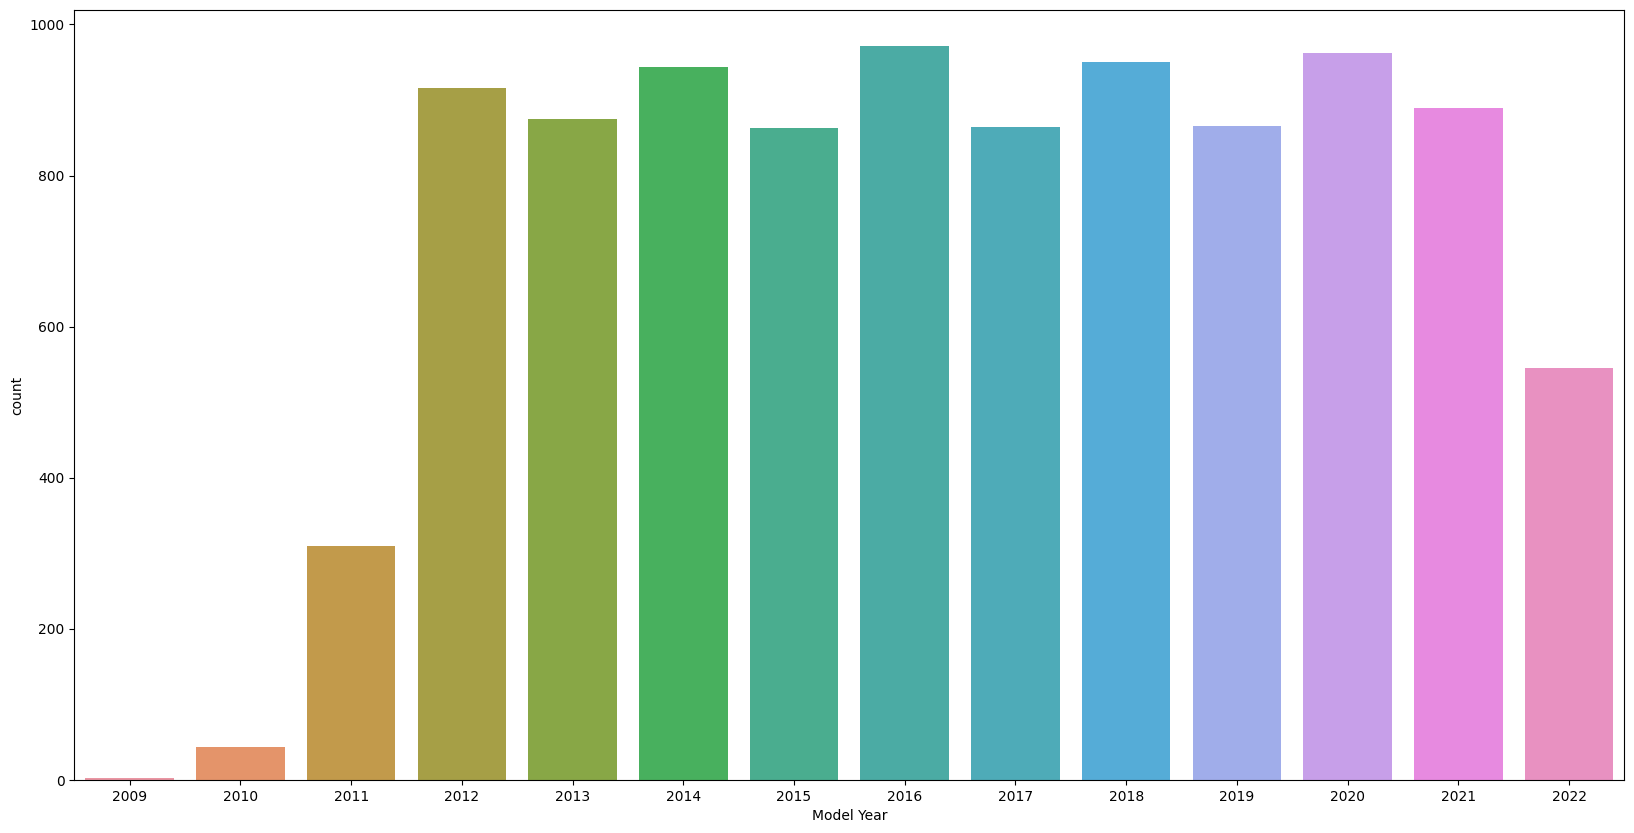

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.countplot(x=df['Model Year']);
plt.show();

In [219]:
df['Model Year'].value_counts(dropna=False)

2016    971
2020    962
2018    950
2014    944
2012    916
2021    889
2013    875
2019    866
2017    864
2015    863
2022    545
2011    310
2010     43
2009      2
Name: Model Year, dtype: int64

## 1.4. Feature - Color

`Color [categorical variable]`:

- White is the domainant color topping over 50% of the 10,000 car data,
- The remaining cars evenly spread over the other colors 'Red', 'Blue', 'Grey', 'Black'

It remains to be seen if this spread of colors matter, though conventional thinking suggest that color should not have much impact on the occurence of car failure.

We shall later perform one-hot encoding on all categorical variables at a single pass later in Section 4 , by using the sklearn DictVectorizer submodule, to produce a csr matrix for efficient model training.

In [220]:
df['Color'] = df['Color'].astype(CategoricalDtype(ordered=False))
df['Color'].value_counts(dropna=False)/len(df)

White    0.5568
Red      0.1159
Blue     0.1129
Grey     0.1086
Black    0.1058
Name: Color, dtype: float64

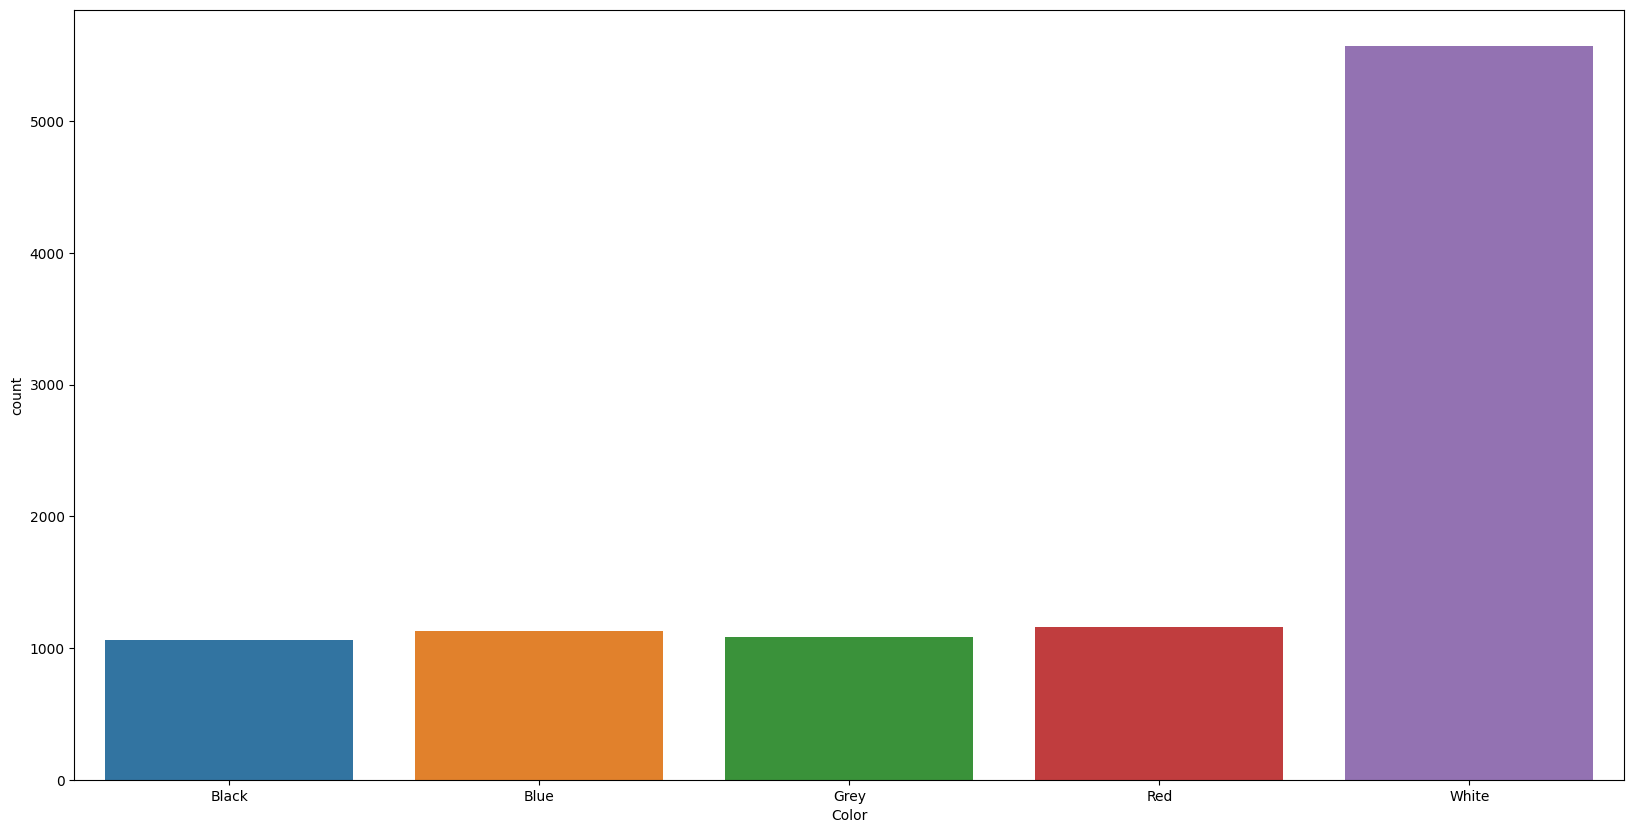

In [221]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Color']);
plt.show();

## 1.5. Feature - Temperature

We note that the `Temperature` feature column vector is currently encoded as an `object`
as there are string values of temperature units such as `°C` or `°F` within these values.

We need to convert all these temperatures to be float type and taking on Celcius as its unit.
- First create 2 temp new columns called `Unconverted_Temp`, `Temp_Unit`, `Temp` containing
- For rows of `df['Temp_Unit']=='°F'` , we convert these temperature values using the formula 

$$ C = (F - 32.0) * \frac{5.0}{9.0}$$

Finally, we retain `'Temp'` as a `float` variable
to be used and drop the rest of the columns related to temperature.

Later in subsection 1.11, we shall discuss further how we can perform binning on continuous variables such as 'Temp', 'RPM' and 'Fuel Consumption'.

In [222]:
df.sample(2)

,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,No-Failure,Failure_Type,Model No,Model Year,Years of Usage
423,White,110.5 °C,1539,"Shang Hai, China",Low,677.5,Normal,0,0,0,0,0,1,Nil,3,2022,2
32,White,112.1 °C,1754,"Shang Hai, China",High,613.0,Normal,0,0,0,0,0,1,Nil,3,2018,6


In [223]:
# From the 'Temperature' column,  
# create 2 temp new columns called `Unconverted_Temp`, `Temp_Unit`
df[['Unconverted_Temp', 'Temp_Unit']] = df['Temperature'].str.split('°', expand=True)
df[['Unconverted_Temp']] = df[['Unconverted_Temp']].astype(float)

# Create a mask corresponding to rows containing 
# Farenheit characters to convert all temperature readings
# in Farenheit units to Celcius units in the new `Temp` column
F_mask = (df['Temp_Unit']=='F')
df['Temp'] = df['Unconverted_Temp']
df.loc[F_mask, 'Temp'] = df[F_mask]['Unconverted_Temp'].apply(lambda x: (x-32)*5/9)

# Drop all previous and temporary columns related to temperature readings 
df.drop(['Temp_Unit', 'Unconverted_Temp', 'Temperature'], axis=1, inplace=True)

## 1.6. Feature - RPM

RPM, or revolutions per minute, is a variable that measures the speed of rotation. In the context of this analysis, it is a numerical variable with a range of values from 0 to infinity. The majority of values for RPM are positive, with 96.8% of the values being greater than 0. However, a small percentage, 2.2%, of values are negatively-valued.

When analyzing the failure classes as shown in the visualisations below, it was observed that there were differences in the rates of classification for different values of RPM especially values that are negatively valued. Since there are recent advances in car technology where this is technically possible to have  see the following quote from ["
Wheel Torque And Speed In Vehicles With In-Wheel Motors" reference by Protean Electric](https://www.proteanelectric.com/wheel-torque-and-speed-in-vehicles-with-in-wheel-motors/), a company that specialises in in-wheel motor technology for passenger cars, light commercial vehicles and future transport solutions like electric vehicles. 

Here is the quote *"... Hand traction, on the other, can be controlled without the use of the brake-based ESC system in an in-wheel motor driven vehicle. The VCU uses the wheel speed information communicated by the in-wheel motors to determine when traction is being lost and reduces the torque demand on that wheel. This can be done without reducing the torque demand to the other wheel. The result can be superior to the action of a conventional TCS because of the fast response time of the in-wheel motor system and the ability of the motors to produce both positive and **negative torque**. We can refer to this as an electronic traction control system (eTCS)...."*


In view of the above, it is important to consider the negative class of values for RPM as there is currently insufficient information from the task to conclude that these values should be disregarded.

One approach is to retain the class of negative values for RPM, which the one we adopt in view of the argument above. An alternative approach is to discard this small negative class of values based on Tukey's fences and compare the results to the approach that retains the negative class. Additionally, creating bins for more features can also be considered to further analyze the data.

It is also important to note that we shall later perform standard scaling on the data to ensure it is properly standardised before training machine learning models.

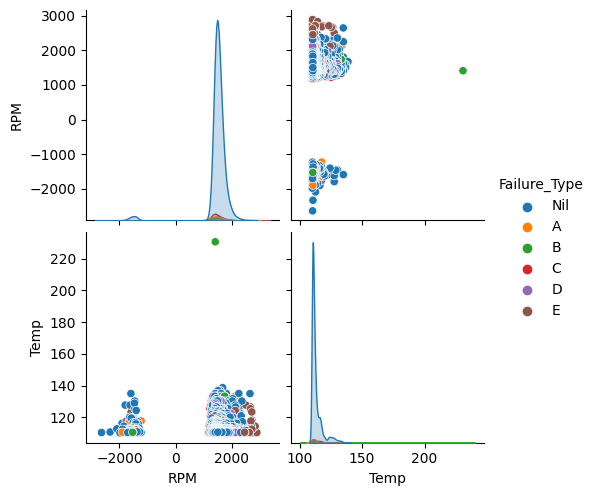

In [224]:
import seaborn as sns 
import matplotlib.pyplot as plt
df['RPM'] = df['RPM'].astype(float)
sns.pairplot(df[['RPM', 'Temp'] + ['Failure_Type']], hue='Failure_Type')
plt.show()

## 1.7. Feature - Factory

`Factory` - [Categorical]

The Factory feature is a categorical variable that denotes the location of the manufacturing facility. In order to properly analyze this feature, it is necessary to perform one-hot encoding as mentioned previously. This process converts the categorical variable into multiple binary variables, one for each category, allowing for more accurate analysis.

It is assumed that the country subfield of the factory feature is correct. However, the city subfield may have inaccuracies. To address this, the most frequent value count will be used to amend the city according to the most frequent value count. We also omit the country since these well-known cities clearly reflect their  countries.

 For example, the city of `Seng Kang, China,` `Newton, China` and `Shang Hai, China` will be replaced with `Shanghai`. Similarly, the city of `Bedok, Germany` will be replaced with `Berlin` and `New York, U.S` shall be replaced by `New York`. This will ensure that the data is accurate and consistent, allowing for more accurate analysis.

In summary, the `Factory` feature is a categorical variable that denotes the location of the manufacturing facility. To analyze this feature, one-hot encoding will be applied and inaccuracies in the city subfield will be corrected by using the most frequent value count. This will ensure that the data is accurate and consistent, allowing for more accurate analysis.

In [225]:
df['Factory'].value_counts(dropna=False)

Shang Hai, China    5478
Berlin, Germany     2215
New York, U.S       2127
Seng Kang, China     106
Newton, China         44
Bedok, Germany        30
Name: Factory, dtype: int64

In [226]:
mapping = {'Seng Kang, China': 'Shanghai', 'Newton, China': 'Shanghai', 'Shang Hai, China': 'Shanghai', 'Bedok, Germany': 'Berlin', 'Berlin, Germany': 'Berlin', 'New York, U.S': 'New York'}
df['Factory'] = df['Factory'].replace(mapping)
df['Factory'] = df['Factory'].astype(CategoricalDtype(ordered=False))
df['Factory'].value_counts(dropna=False)

Shanghai    5628
Berlin      2245
New York    2127
Name: Factory, dtype: int64

## 1.8. Feature - Usage

`Usage` - [Ordinal]

The Usage feature is an ordinal variable that describes the owner's usage frequency of the car. This feature can have three possible values: Low, Medium, and High. The distribution of this feature within the dataset is relatively balanced, with similar proportions of each class.

To further analyze the relationship between the Usage feature and the target variable, we will perform a crosstabulation of all categorical variables against the target variable in later sections. 

This will allow us to understand the association between the Usage feature and the target variable, and how it compares to other categorical variables. 

Additionally, we will also perform hypothesis testing of association with the target variables to determine if there is a statistically significant relationship between the `Usage` feature and the target variables. This will provide a deeper understanding of the role of the Usage feature in the analysis. Overall, this feature is important to understand the car usage which can relate to the target variables.

In [227]:
df['Usage'] = df['Usage'].astype(CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True))
df['Usage'].value_counts(dropna=False)

High      3527
Medium    3335
Low       3138
Name: Usage, dtype: int64

## 1.9.  Feature - Fuel Consumption

`Fuel consumption` - [float]

The `Fuel Consumption` feature is a numerical variable that measures the fuel consumption of the car, measured in Liters per Kilometer. In the analysis of this feature, it is important to consider the seemingly outliers in its column vector. These outliers may have separability of target classes, as demonstrated in a pairplot with RPM against the 6 target variables. Therefore, it is important to retain these seemingly outliers in the analysis. It shall also be abbreviated to `Fuel`.

To further analyze the relationship between the Fuel Consumption feature and the target variable, we may also consider performing binning to create more features. This will allow us to understand how different ranges of fuel consumption relate to the target variable and how it compares to other variables. Overall, this feature is important to understand the car's fuel efficiency which can relate to the target variable.

In [228]:
df.rename(columns={"Fuel consumption": "Fuel"}, inplace=True)
df['Fuel'].describe()

count    10000.000000
mean       679.456990
std         58.439696
min        598.500000
25%        638.875000
50%        668.500000
75%        704.200000
max        904.800000
Name: Fuel, dtype: float64

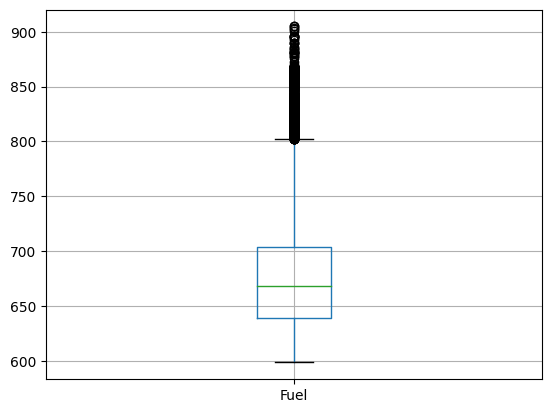

In [229]:
df[['Fuel']].boxplot()
plt.show()

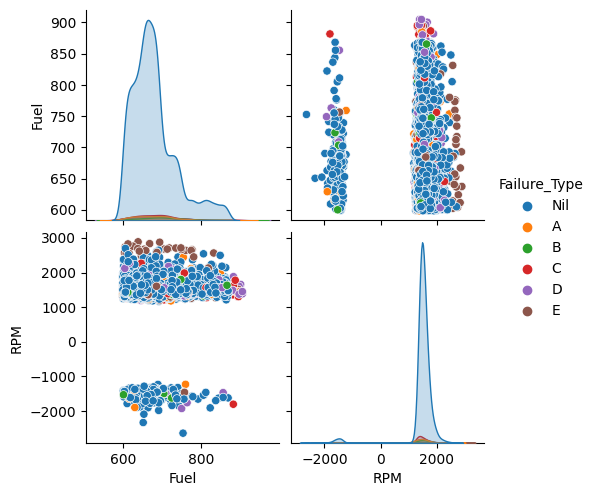

In [230]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.pairplot(df[['Fuel', 'RPM'] + ['Failure_Type']], hue='Failure_Type')
plt.show()

## 1.10. Feature - Membership

`Membership` - [ordinal]

The Membership feature is an ordinal variable that describes the type of membership subscribed by the car owner with the automotive company. "Normal" membership offers subscribers two complimentary car servicing per year, while "Premium" membership offers subscribers unlimited car servicing. Car owners are automatically subscribed with "Normal" membership for the first five years after car purchase.

During the analysis, it was found that this feature contains 383 (3.8%) null values. However, upon further investigation, it was revealed that all of these null values correspond to cars with less than 5 years of ownership (inferred from 'Model Year'). Thus, these null values are replaced with "Normal" based on the given context.

By doing value_counts, it was confirmed that cars with the Membership feature =='None' have 'Years Elapsed' >5, which means that their membership have expired. On the other hand, cars with null-values of Membership have 'Year Elapsed' <=5, so based on the given context, that car owners are automatically subscribed with "Normal" membership for the first 5 years after car purchase, the value 'Normal' is chosen to be assigned to these cars since it also happens to be the mode.

Post-data processing reveals the ratio of 'Membership' groups as Normal:Premium:None $\approx$ 47:34:19. The membership feature is relevant for all failure types.

In [231]:
df['Membership'].value_counts(dropna=False)

Normal     4483
Premium    3416
None       1718
None        383
Name: Membership, dtype: int64

The code below is used to handle the missing values in the 'Membership' feature. It starts by creating a mask to identify the rows where 'Membership' is null. 

Then, it assigns 'None' to 'Membership' where the 'Years of Usage' is greater than 5 and 'Membership' is null. Similarly, it assigns 'Normal' to 'Membership' where the 'Years of Usage' is less than or equal to 5 and 'Membership' is null. 

Then it drops the 'Years of Usage' column as it is no longer needed. Finally, the data type of 'Membership' column is changed to Categorical and the value counts of 'Membership' are checked after the changes.

In [232]:
# Create a mask to identify rows where 'Membership' is null
memb_isna_mask = df['Membership'].isna()

# Assign 'None' to 'Membership' where the 'Years of Usage' is greater than 5 and 'Membership' is null
df.loc[memb_isna_mask & (df['Years of Usage']>5), 'Membership'] = 'None'

# Assign 'Normal' to 'Membership' where the 'Years of Usage' is less than or equal to 5 and 'Membership' is null
df.loc[memb_isna_mask & (df['Years of Usage']<=5), 'Membership'] = 'Normal'

# Drop the 'Years of Usage' column
df.drop('Years of Usage', axis=1, inplace=True)

# Change the data type of 'Membership' column to Categorical
df['Membership'] = df['Membership'].astype(CategoricalDtype(categories=['None', 'Normal', 'Premium'], ordered=True))

# Check the value counts of 'Membership' after the changes
df['Membership'].value_counts(dropna=False)

Normal     4649
Premium    3416
None       1935
Name: Membership, dtype: int64

## 1.11. Binning Float Variables

The code presented below is used to perform binning on the float variables in the dataset. Binning is a process of grouping a set of continuous numerical variables into a smaller set of discrete "bins" or intervals. The purpose of this process is to reduce the noise and variability in the data, and to make the data more manageable and interpretable.

The code begins by importing the KMeans class from the scikit-learn library, which is used to perform k-means clustering. A function called find_elbow is also defined, which takes the WCSS values for different numbers of clusters and finds the "elbow" in the WCSS curve, which is the point of inflection where adding more clusters no longer significantly decreases WCSS.

Next, the code creates a mask to select only the float variables in the dataset, and stores the names of these variables in a list called float_columns. The script then loops through each float variable in the list, and performs the following steps:

1. For each float variable, it first fills the missing values with the median of the column.
2. Then, it reshapes the data into a 2D array to fit the k-means clustering model.

3. It fits k-means clustering models with different values of k (between 1 and kmax, which is defined as 10 at the beginning of the code) and computes the WCSS for each model.

4. It then calls the find_elbow function with the WCSS values to determine the optimal number of clusters.

5. Next, it generates the quantile edges using pandas.qcut with the number of quantiles (i.e. the number of bins) which is equal to the optimal number of clusters found above.

6. It then adds a small constant to the second edge of each bin to avoid duplicate edges and set the last edge to the maximum value of the column.

7. It uses the quantile edges to generate the quantile labels, which are the group names for each bin.

8. It creates a new column in the dataframe for each float variable that contains the group names for each data point.

9. Finally, the code store the (float_columns, cols_quantile_edges, cols_group_names) to be reloaded for transforming test-sets.

In summary, this code performs binning on the float variables in the dataset using k-means clustering to determine the optimal number of bins for each variable. The resulting binned variables are stored in new columns in the dataframe, and the information about the bin edges and group names is stored for future use.

In [233]:
from sklearn.cluster import KMeans
kmax = 10

def find_elbow(wcss):
    """Find the "elbow" in the WCSS curve, which is the point of inflection where adding more clusters no longer significantly decreases WCSS.
    Parameters
    ----------
    wcss : list or numpy array
    The within-cluster sum of squares (WCSS) values for different numbers of clusters.
        
    Returns
    -------
    cluster_num : int
    An estimate of the optimal number of clusters corresponding to the elbow in the WCSS curve.
    """
    # Calculate the 1st order finite differences between consecutive WCSS values
    diff = np.diff(wcss) 
    # padded with two '1.0' to account for loss of 1st two indices, this means we are aiming for k>=3
    ratio_diff = np.concatenate((np.array([1.0, 1.0]), diff[1:]/diff[:-1])) 
    # Return the number of clusters corresponding to the elbow index
    cluster_num = np.argmin(ratio_diff) + 1
    return cluster_num

float_feature_mask = (df.dtypes == 'float')
# Get list of float variable column names (string-like variables that have)
float_columns = df.columns[float_feature_mask].tolist()
# float_columns = ['RPM', 'Fuel']
cols_quantile_edges = []
cols_group_names = []

for col in float_columns:
    grp_col = col + '_group'
    data = df[col].fillna(df[col].median()).values
    data_reshaped = data.reshape(-1,1)
    # Fit k-means clustering models with different values of k
    wcss = [KMeans(n_clusters=k, n_init=10, max_iter=500, random_state=200).fit(data_reshaped).inertia_ for k in range(1, kmax+1)]
    wcss_opt_k = find_elbow(wcss)
    # Generate the quantile edges using pandas.qcut with the number of quantiles (i.e. the number of bins)
    quantile_edges = np.floor(pd.qcut(data, wcss_opt_k, retbins=True, duplicates='drop')[1])
    # add small constant (e.g. 0.0001) to the second edge of each bin to avoid duplicate edges
    quantile_edges[1:-1] += 0.0001
    quantile_edges[-1] = np.ceil(df[col].max())
    # Use the quantile edges to generate the quantile labels
    group_names = ['{}-{}'.format(int(quantile_edges[i]), int(quantile_edges[i+1]) if i < len(quantile_edges)-2 else int(quantile_edges[i+1])) for i in range(len(quantile_edges)-1)]
    df[grp_col] = pd.cut(df[col], quantile_edges, labels=group_names, include_lowest=True)
    cols_quantile_edges.append(quantile_edges)
    cols_group_names.append(group_names)
    ## Store the (float_columns, cols_quantile_edges, cols_group_names) to be reloaded for transforming test-sets

n_float_cols = len(cols_group_names)
for i in range(0, n_float_cols):
    col = float_columns[i]
    quantile_edges = cols_quantile_edges[i]
    group_names = cols_group_names[i]
    grp_column = col + '_group'
    df[grp_column] = pd.cut(df[col], quantile_edges, labels=group_names, include_lowest=True)

df['Temp_group'].value_counts(dropna=False)

110-112    6126
112-231    3871
110-110       3
Name: Temp_group, dtype: int64

In [234]:
df['RPM_group'].value_counts()

-2636-1445    3359
1445-1565     3324
1565-2886     3317
Name: RPM_group, dtype: int64

Due to the small count, we shall combine 110-110 group together with the group 110-111 to have only 3 groups for the colume 'Temp'.

In [235]:
df[df['Temp_group']=='110-110'][['Temp', 'Temp_group']]

# Fixing the error in the Temp_group category range
df['Temp_group'] = df['Temp_group'].astype('object')
df['Temp_group'] = df['Temp_group'].replace('110-110', '110-112')
df['Temp_group'] = df['Temp_group'].astype(CategoricalDtype(categories=['110-112', '112-231'], ordered=True))

# Creating a new category in the RPM_group category range
df[(df['RPM']<1445) & (df['RPM']>=0)].shape[0]
df['RPM_group'] = df['RPM_group'].astype(CategoricalDtype(categories=['-2636-0','0-1445','1445-1565','1565-2886'], ordered=True))
df.loc[df['RPM']<0, 'RPM_group']='-2636-0'
df.loc[(df['RPM']>=0) & (df['RPM']<=1445), 'RPM_group']='0-1445'

# Count of each Temp_group categories
df['Temp_group'].value_counts(dropna=False)

110-112    6129
112-231    3871
Name: Temp_group, dtype: int64

Note that we have taken steps to create a new group for `df['RPM_group']`, to see if negatively-valued RPM can affect the classifications.

In [236]:
df['RPM_group'].value_counts(dropna=False)

1445-1565    3324
1565-2886    3317
0-1445       3139
-2636-0       220
Name: RPM_group, dtype: int64

In [237]:
df['Fuel_group'].value_counts(dropna=False)

687-905    3389
598-650    3309
650-687    3302
Name: Fuel_group, dtype: int64

After a thorough analysis of the features and their relationship to the target variable, it has been decided to drop the Model and Years of Usage features from the dataset. These features were found to be less relevant to the target variable, and their removal will not significantly impact the accuracy of the model.

The target variables for this analysis are Failure A, Failure B, Failure C, Failure D, Failure E, Non-Failure, Failure_Type. These variables will be used to train the model and make predictions.

The final feature variables that will be used for model training are:

- Float variables (scaled): RPM, Fuel consumption, Temp

- Ordinal variables: Model No, Model Year, Usage, Membership, RPM_group, Fuel_group, Temp_group

- Categorical variables: Color, Factory

These variables have been found to be the most relevant to the target variable and will provide the most useful information for the model.


# 2.Univariate Analysis with Target Variables

Univariate analysis is the process of analyzing each individual variable in a dataset separately. When it comes to analyzing target variables specifically, univariate analysis can be useful as a starting point in a machine learning project.

 This is because understanding the distribution, summary statistics and any patterns or anomalies in the target variable can provide valuable insights into the problem you're trying to solve. 
 
 For example, if the target variable is highly imbalanced, this could have a significant impact on the performance of certain machine learning models, and may require additional data preprocessing or oversampling techniques to be used. 
 
 Additionally, univariate analysis can help identify any outliers or missing values in the target variable, which can also affect the performance of machine learning models. 
 
 Overall, univariate analysis of the target variable can help to inform the selection of appropriate models and features, as well as the design of any data preprocessing or feature engineering steps that may be required.

## 2.1. Float variables against Target Variables

We now generate a figure with subplots so that we can visualise distributional plots of continuous variables against the target variable. 

The code below first identify the continuous variables in the dataset X by using select_dtypes method and select columns that include only float type. Then it defines the target variable as 'Failure_Type'. 

Next, it calculates the number of rows and columns needed for the subplots. After that, it creates a figure with the subplots using the plt.subplots method. 

It then uses a for loop to iterate over the continuous variables and create a distributional plot in each subplot using the seaborn's kdeplot method. It also uses the hue parameter to show the different levels of the target variable. 

In [238]:
target_labels = df[target_vars]
X = df.drop(target_vars, axis=1)

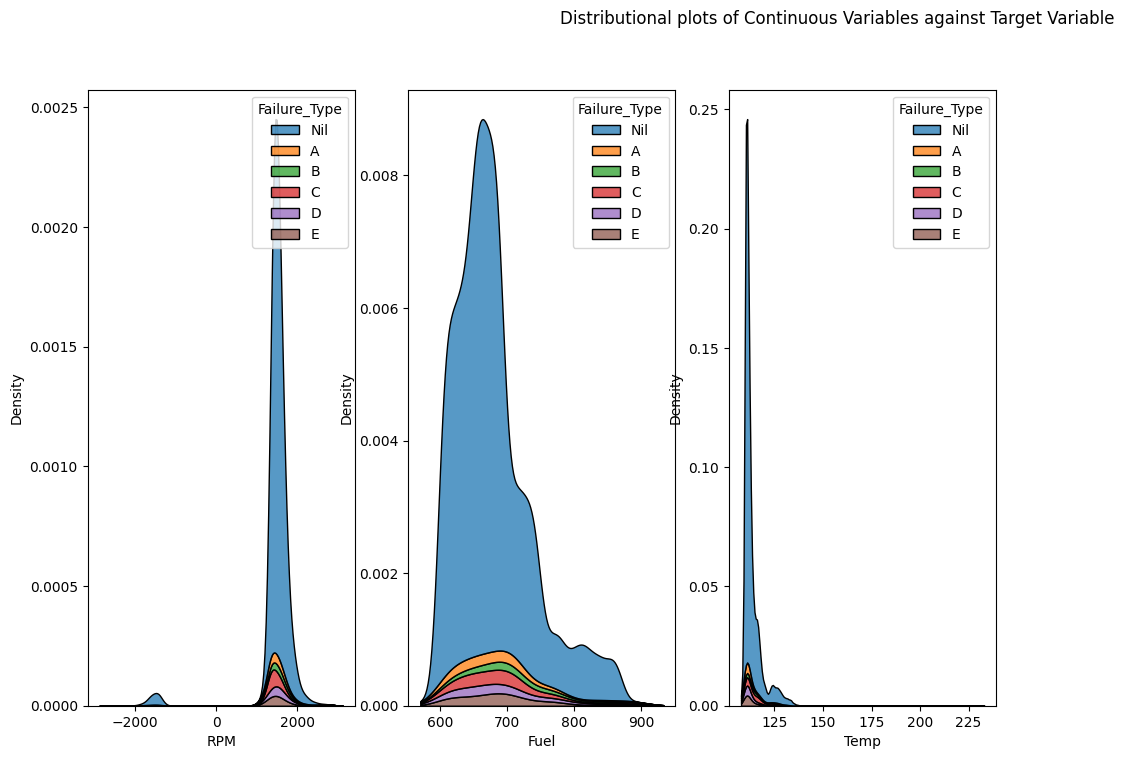

In [239]:
cts_variables = X.select_dtypes(include=['float']).columns.tolist()

target_var = 'Failure_Type'
# X_df['Failure_Type'] = X['Failure_Type']
# Calculate the number of rows and columns needed for the subplots
n = len(cts_variables)
cols = 5
rows = int(np.ceil(n / cols))

# Create a figure with the subplots
fig, axs = plt.subplots(rows, cols, figsize=(20, 8))
if rows == 1:
    axs = axs.reshape(1, cols)

# Iterate over the dataframes and create a crosstab plot for each one
for i in np.arange(0,n):
    # Get the index of the subplot
    row = i // cols # row : quotient
    col = i % cols  # col : remainder

    # Create the distributional plot in the subplot
    sns.kdeplot(data=X, x=cts_variables[i], hue=target_var, ax=axs[row, col], multiple='stack');

for j in np.arange(n%cols,cols):
    axs[n//cols,j].set_visible(False)

# Add a title to the figure
fig.suptitle('Distributional plots of Continuous Variables against Target Variable')

# Show the plot
plt.show()

From the density plots for different target variables, it appears that it is challenging to discern clear distinctions between the different target variable's density distributions. However, relatively speaking, 'Temp' shows the most significant change in density between the 'No-Failure' group's density plot and the density plots of the other 'Failure_Types'. This suggests that 'Temp' may be a more effective discriminator of positive classes, compared to the other two features, 'RPM' and 'Fuel'.

## 2.2. Hypothesis Testing for Continuous distributions of diferrent Target classes

Density plots provide a visual representation of the distribution of a continuous variable, which can be useful for understanding the underlying structure of the data. However, simply looking at a density plot is not enough to fully understand the distribution of the variable and how it relates to the target class. This is where hypothesis testing comes in.

Hypothesis testing allows us to make inferences about the population based on a sample of data. By conducting hypothesis tests, we can determine if there are significant differences in the distribution of the continuous variable for different target classes. This information can then be used to inform our machine learning model, as it can help us understand which features are most important for making predictions about the target class.

For example, if we find that the distribution of a continuous variable is significantly different for two different target classes, we may want to include that variable as a feature in our model. On the other hand, if the distribution is not significantly different, it may not be as useful a feature. By conducting hypothesis tests, we can gain a deeper understanding of the relationships between the continuous variable and the target class, which can ultimately lead to better model performance.

Additionally, hypothesis testing also gives us a measure of the level of confidence we have in the results of our analysis and this is extremely important in the field of machine learning. This allows us to make more informed decisions about the features that we include in our model, and can ultimately lead to more accurate and reliable predictions.

In summary, following up on density plots with hypothesis testing is important because it allows us to gain a deeper understanding of the relationships between continuous variables and the target class, which can inform our machine learning model and lead to more accurate predictions. Additionally, hypothesis testing gives us a level of confidence in the results of our analysis.

In [240]:
# Brunner-Munzel test: a non-parametic & non-equal variances extension-version of two-sample t-test)
# for multiple response variables
import pandas as pd
import scipy.stats

# Load the data
alpha = 0.05
data = X[cts_variables]

all_hyp_test_results_df = pd.DataFrame()
for var in target_vars:
    groups = df[var]

    # Initialize an empty list to store the results
    hyp_test_results = []

    # Iterate over the columns in the dataframe
    for col in data.columns:
        # Extract the response variable and the group labels
        y = data[col]

        # Conduct the Brunner-Munzel test
        statistic, p_value = scipy.stats.brunnermunzel(y[groups == 0], y[groups == 1])

        # Append the results to the list
        hyp_test_results.append({'Target Variable': var, 'Response Cts variable': col, 'Test Statistic': statistic, 'p-value': p_value, 'Distributions Statistically Different?': (p_value<alpha)})

    # Convert the list to a dataframe
    hyp_test_results_df = pd.DataFrame(hyp_test_results)

    # Concatenate to dataframe of overall hypothesis testing results
    all_hyp_test_results_df = pd.concat([all_hyp_test_results_df, hyp_test_results_df.sort_values('p-value', ascending=True)])

In [241]:
all_hyp_test_results_df

,Target Variable,Response Cts variable,Test Statistic,p-value,Distributions Statistically Different?
1,No-Failure,Fuel,-8.515235,3.815598e-17,True
0,No-Failure,RPM,6.511623,1.010558e-10,True
2,No-Failure,Temp,-3.876776,1.101389e-04,True
0,Failure A,RPM,-6.316512,1.107129e-09,True
1,Failure A,Fuel,1.942101,5.316302e-02,False
2,Failure A,Temp,-0.158446,8.742235e-01,False
1,Failure B,Fuel,6.622198,3.515939e-10,True
0,Failure B,RPM,-0.503779,6.149986e-01,False
2,Failure B,Temp,0.149730,8.811345e-01,False
2,Failure C,Temp,8.318854,2.442491e-15,True


## 2.3.Categorical Variable Crosstab Analysis with respect to target variable

Categorical variable crosstab analysis, also known as contingency table analysis, is a technique used to understand the relationship between two categorical variables. In the context of machine learning, it is used to understand the relationship between a categorical independent variable and a categorical dependent variable, also known as the target variable.

Performing crosstab analysis prior to training a machine learning model can be beneficial in several ways. Firstly, it allows us to identify any patterns or associations between the independent and dependent variables. For example, if we see that a particular category of the independent variable is strongly associated with a particular category of the dependent variable, we may want to include that variable as a feature in our model.

Secondly, crosstab analysis can also help us identify any potential confounding variables. Confounding variables are variables that may be associated with both the independent and dependent variables, and can affect the relationship between them. By identifying potential confounding variables, we can take steps to control for them in our model, which can improve the accuracy of our predictions.

Thirdly, crosstab analysis can also help us identify any potential problems with the data, such as missing values or outliers. By identifying these issues early on, we can take steps to address them before training our model, which can improve the performance of our model.

In summary, performing crosstab analysis on categorical variables prior to training a machine learning model can be beneficial in several ways. It allows us to identify patterns or associations between variables, identify confounding variables, and identify any potential problems with the data. By taking these steps, we can improve the accuracy of our predictions and the performance of our model.

<Figure size 2000x3200 with 0 Axes>

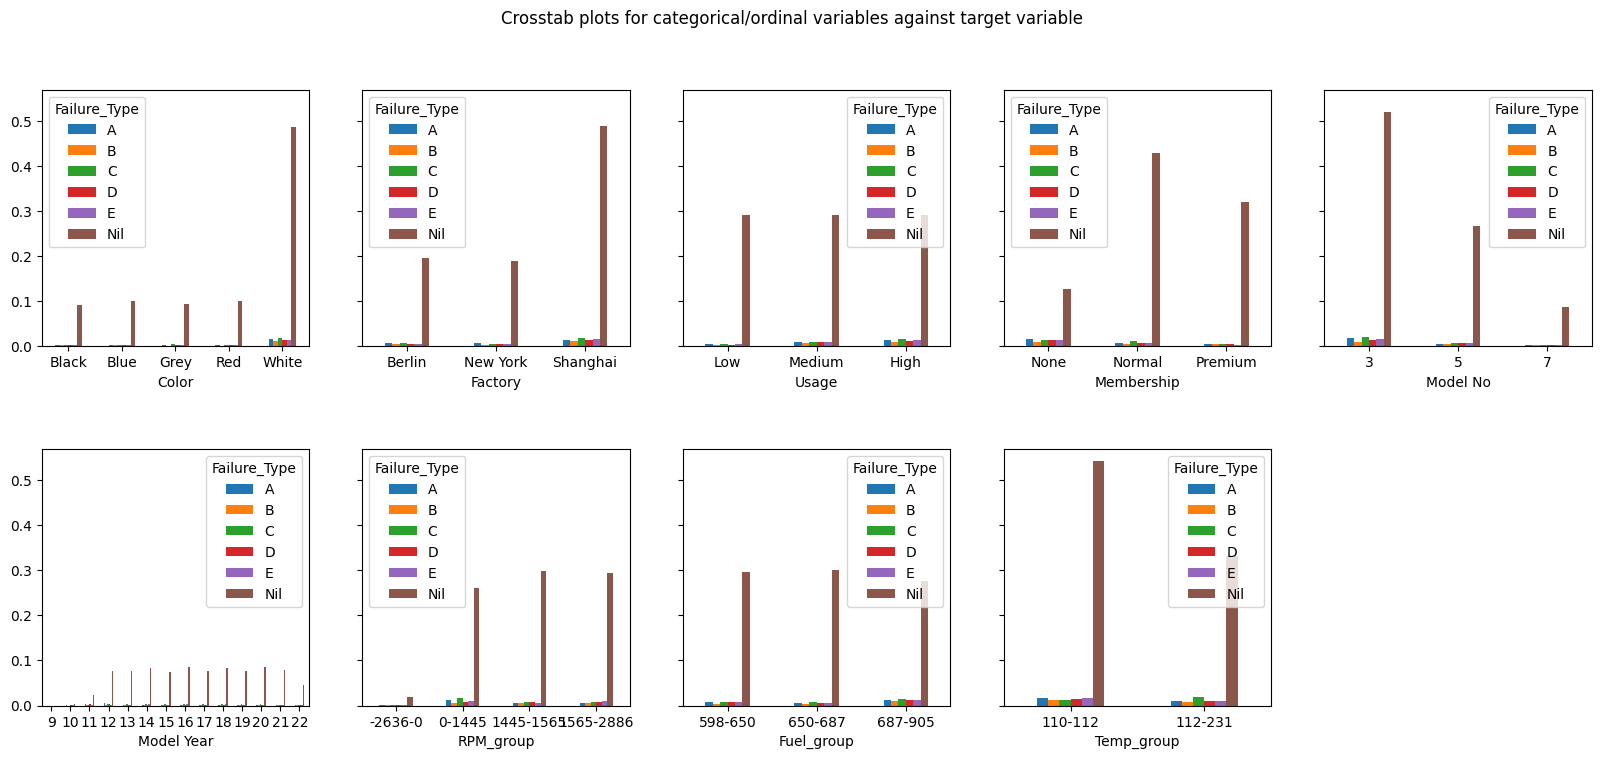

In [242]:
cat_ord_vars = X.select_dtypes(include=['category']).columns.tolist()
def plot_crosstabs(DF, targ_var):
    CatOrdVars = DF.select_dtypes(include=['category']).columns.tolist()
    plt.figure(figsize=(20, 32))
    # Calculate the number of rows and columns needed for the subplots
    n = len(CatOrdVars)
    rows = int(np.ceil(n / 5))
    cols = 5

    # Create a figure with the subplots
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 8), sharey=True)
    if rows == 1:
        axs = axs.reshape(1,cols)

    # Iterate over the dataframes and create a crosstab plot for each one
    for i in np.arange(0, n):
        # Get the index of the subplot
        row = i // cols # row : quotient
        col = i % cols  # col : remainder

        # Create the crosstab plot in the subplot
        if CatOrdVars[i] != 'Model Year':
            pd.crosstab(DF[CatOrdVars[i]], DF[targ_var], normalize=True).plot(kind='bar', ax=axs[row, col], rot=0)
        elif CatOrdVars[i] == 'Model Year':
            pd.crosstab(DF[CatOrdVars[i]].astype(int) - 2000, DF[targ_var], normalize=True).plot(kind='bar', ax=axs[row, col], rot=0)
        else:
            pass

    for j in np.arange(n%cols,cols):
        axs[n//cols,j].set_visible(False)

    plt.xticks(fontsize=2, rotation=0)

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    # Add a title to the figure
    fig.suptitle('Crosstab plots for categorical/ordinal variables against target variable')

    # Show the plot
    plt.show()
plot_crosstabs(X, target_var)

Not surprisingly, since the class of Failure_Type=Nil is a high majority, we for now compare the distribution of the Failure Type across the different categorical types, and we can observe that for the factor of Membership, Failure_Type=None has a relatively much lower representation compared to 'Normal' and 'Premium' membership. However, we also see that for the factor of Color, it appears maybe White can have influence on the Failure Type as well? As it is difficult to ascertain based on visuals alone, we should use  chi-squared hypothesis testing to test for any statistical association between each of these categorical/ordinal features against the categorical target variables.

As the overwhelming majority class make the visual comparison of categorical/ordinal features to analyze other target variables, below we extract the rows that do not correspond to the majority class to peform easier comparison of categorical/ordinal features against other target variables, before we look at hypothesis testing.

<Figure size 2000x3200 with 0 Axes>

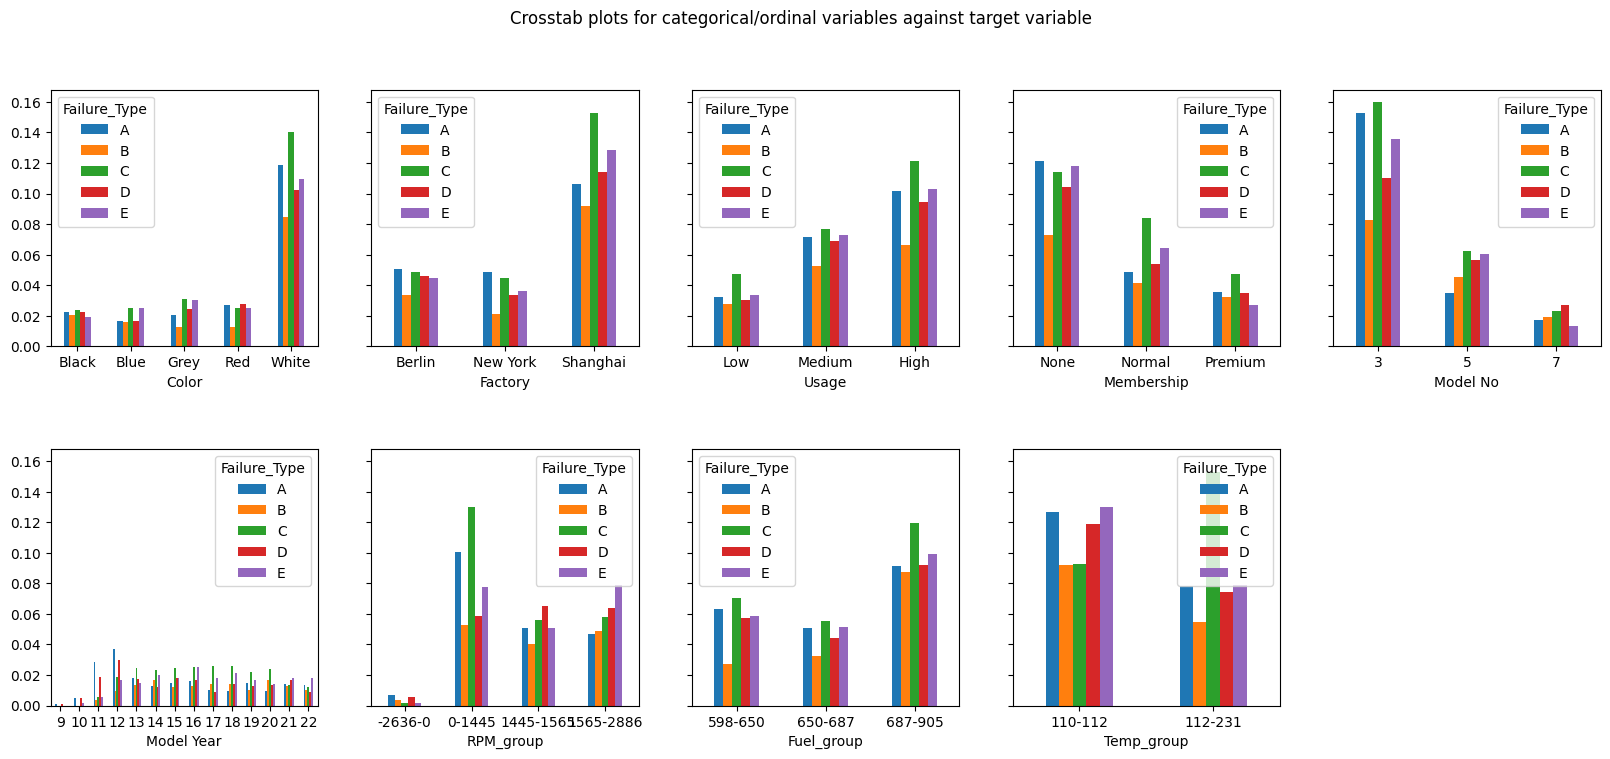

In [243]:
W = X[X['Failure_Type']!='Nil']
plot_crosstabs(W, target_var)

From the crosstabular plots above of each categorical/ordinal feature variable against the remaining 5 target variables, we observe that there is generally even distribution across each of the 5 failure types with the following notable exceptions:

- `Factory`: For each factory, the corresponding cars produced are generally evenly distributed across the 5 failure types, with some small exceptions in Failure Type B being relatively lower than the rest for the New York factory, and Failure Type C being relatively more prominent compared to the others for the Shanghai factory.
- `Usage`: Each of the Usage group, its corresponding cars are also rather evenly distributed across the 5 failure types, except that Failure Type B being relatively lower than the rest for the `Usage=Medium,High` usage groups.
- `Membership`: with Failure Type B being noticeably lower in occurence for the Membership=`None` group, and Type C being relatively higher in occurence than the others for `Normal` group.

- `Model No`: Failure Types A, C being relatively higher in occurence than the others for `Model No=3` group.

- `RPM_group`: Failure Types A, C are more dominant than the others in `RPM=0-1445 group`.

- `Fuel_group`: Failure Type B being noticely less frequent in occurences for `Fuel_group=598-650, 650-687`.

- `Temp_group`: Failure Type C being relatively higher in occurence than the others for `Temp_group=112-231` group.

## 2.4. Chi-square test of independence for a pair of categorical variable and the target variables

As seen from the crosstabular plots above, it is challenging to be certain which features are statisically associated with the target variables, thus we now perform Chi-square tests of independence for a pair of categorical variable and the target variables to ascertain this.

Conducting a chi-square test of independence for a pair of categorical variables and the target variable prior to training a machine learning model is beneficial because it allows us to test the null hypothesis that the two variables are independent of one another. If the null hypothesis is rejected, it suggests that there is a relationship or association between the two variables, which can inform our decision on which features to include in our model.

The chi-square test of independence is a widely used statistical test for determining if there is a significant association between two categorical variables. The test calculates the chi-square statistic and p-value, which can be used to make inferences about the relationship between the variables.

The chi2_contingency function from the scipy.stats library in Python is a convenient tool for conducting the chi-square test of independence. By providing the function with a contingency table of the counts of observations for each combination of the two variables, it can calculate the chi-square statistic and p-value.

In the context of machine learning, using the chi-square test of independence can help us identify which independent variables are most strongly associated with the target variable. These variables are more likely to be important in predicting the target variable and thus should be included as features in our model.

In summary, conducting a chi-square test of independence for a pair of categorical variables and the target variable prior to training a machine learning model allows us to test the null hypothesis of independence and determine if there is a significant relationship between the variables. This information can then be used to inform the selection of features for our model and ultimately improve the performance of the model.

In [244]:
import scipy.stats
import pandas as pd

# Load the data
data = X[cat_ord_vars]

alpha = 0.05
all_results_df = pd.DataFrame()

for var1 in target_vars:
    # Initialize an empty list to store the results
    results = []

    # Iterate over the pairs of columns in the dataframe
    for col in data.columns:
        # Extract the categorical variables
        var2 = data[col]
        
        # Conduct the chi-square test of independence
        chi2_stat, p_value, _, _ = scipy.stats.chi2_contingency(pd.crosstab(df[var1], var2))

        # Append the results to the list
        results.append({'Target Variable': var1,  'Categorical/Ordinal Variable': col, 'Chi-square statistic': chi2_stat, 'p-value': p_value, 'Association Statistically Significant?': (p_value<alpha)})

    # Convert the list to a dataframe
    results_df = pd.DataFrame(results)
   
    # Concatenate to dataframe of overall hypothesis testing results
    all_results_df = pd.concat([all_results_df, results_df.sort_values('p-value', ascending=True)])

The hypothesis testing results reveal the following statistical association between each target variable and the categorical variables:

- No-failure: All Categorical/Ordinal Variables
- Failure Type A: Membership: Model Year, RPM_group, Usage, Model No, Fuel_group
- Failure Type B: Membership, Fuel_group, Usage
- Failure Type C: Membership, Temp_group, RPM_group, Fuel_group, Usage
- Failure Type D: Membership, Model Year, Usage, Fuel_group
- Failure Type E: Membership, Usage, Fuel_group, RPM_group

In [245]:
all_results_df[all_results_df['Association Statistically Significant?']==True]

,Target Variable,Categorical/Ordinal Variable,Chi-square statistic,p-value,Association Statistically Significant?
3,No-Failure,Membership,1056.857999,3.207757e-230,True
2,No-Failure,Usage,167.324453,4.634008e-37,True
7,No-Failure,Fuel_group,148.808141,4.860968e-33,True
6,No-Failure,RPM_group,78.159186,7.617845e-17,True
5,No-Failure,Model Year,98.645431,3.034733e-15,True
8,No-Failure,Temp_group,16.639405,4.520208e-05,True
4,No-Failure,Model No,11.997072,2.482384e-03,True
1,No-Failure,Factory,8.098138,1.743860e-02,True
3,Failure A,Membership,268.845738,4.177244e-59,True
5,Failure A,Model Year,187.711013,4.511366e-33,True


# 3.Scaling Float Features

Scaling or standardization of float variable features is beneficial prior to training a machine learning model for several reasons:

It ensures that all features are on a similar scale: Some machine learning algorithms, such as k-nearest neighbors, rely on distance measures to make predictions. If the features are on different scales, then the algorithm may be dominated by the features with larger scales, which can lead to poor performance. Scaling the features to a similar scale can help mitigate this issue.

It helps to improve the performance of certain algorithms: Some algorithms, such as linear and logistic regression, are sensitive to the scale of the features. By scaling the features, we can improve the performance of these algorithms.

It can help to improve the interpretability of the model: Scaling the features can make it easier to interpret the importance of each feature by removing the scale of the data and making the coefficients of the model more interpretable

It can help to improve the convergence of Gradient Descent based algorithm: Gradient descent algorithms are sensitive to the scale of the features, if the feature scales are very different, the algorithm may converge slowly or may not converge at all. Scaling the features can help improve the convergence of these algorithms.

There are different ways to scale features, for example, Min-Max scaling, Z-score standardization, and MaxAbs scaling are a few examples. The choice of scaling method may depend on the specific requirements of the model, and the characteristics of the data.

In summary, performing scaling or standardization on float variable features prior to training a machine learning model is beneficial because it ensures that all features are on a similar scale, improves the performance of certain algorithms, improves the interpretability of the model and can help improve the convergence of Gradient Descent based algorithm.

In [246]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn_pandas import DataFrameMapper

class DataframeFeatureScalerUnion(BaseEstimator, TransformerMixin):
    """Custom transformer class for scaling and combining float and categorical features in a dataframe.
    
    Parameters
    ----------
    ordinal_columns : list
        List of ordinal column names.
    special_ord_col : str
        Name of special ordinal column that requires reordering.
    
    Attributes
    ----------
    categorical_columns : list
        List of categorical column names from input data.
    categorical_feature_mask : boolean mask
        Boolean mask for identifying categorical columns in input data.
    float_columns : list
        List of float column names from input data.
    float_feature_mask : boolean mask
        Boolean mask for identifying float columns in input data.
    float_scaling_mapper : DataFrameMapper
        DataFrameMapper object for scaling float features.
    categorical_identity_mapper : DataFrameMapper
        DataFrameMapper object for applying identity transformation on categorical features.
    
    Methods
    -------
    fit(X, y=None)
        Fits the transformer on the input data.
    transform(X, y=None)
        Transforms the input data.

    Examples
    --------
    >>> X = pd.DataFrame({'Age': np.array([25.0, 30.0, 35.0]), 'Cabin': np.array(['A1', 'B2', 'C3']), 'Pclass': np.array([ 1, 2, 3]),'SibSp':np.array([0, 2, 1]), 'Parch': np.array([1, 2, 0]) })
    >>> df_feat_scaler_union = DataframeFeatureScalerUnion()
    >>> print(df_feat_scaler_union.fit_transform(input_dataframe))
            Age Cabin Pclass SibSp Parch
    0 -1.224745    A1      1     0     1
    1  0.000000    B2      2     2     2
    2  1.224745    C3      3     1     0
    """
    def __init__(self):
        self.ordinal_columns = ['Model No', 'Model Year', 'Usage', 'Membership', 'RPM_group', 'Fuel_group', 'Temp_group']
        pass

    def fit(self, X, y=None):
        """Fit the transformer on the input data.
        
        Parameters
        ----------
        X : pandas dataframe
            Input data.
        y : None
            Dummy parameter to adhere to scikit-learn transformer convention.
            
        Returns
        -------
        self : DataframeFeatureScalerUnion
            Returns an instance of self.
        """
        # Create a boolean mask for categorical columns
        self.categorical_feature_mask = ((X.dtypes == 'category')|(X.dtypes == 'object')|(X.dtypes == 'bool')|(X.dtypes == 'int'))
        # Store list of categorical column names from X
        self.categorical_columns = X.columns[self.categorical_feature_mask].tolist()
        # Create a boolean mask for float columns
        self.float_feature_mask = (X.dtypes == float)
        # Store list of float column names from X
        self.float_columns = X.columns[self.float_feature_mask].tolist()

        # Apply standard scaling mapper on float features
        float_scaling_mapper = DataFrameMapper([([float_feature], StandardScaler()) for float_feature in self.float_columns],
                                                    input_df=True,
                                                    df_out=True
                                                   )
        # Apply identity mapper on categorical features
        categorical_identity_mapper = DataFrameMapper([([category_feature], FunctionTransformer()) for category_feature in self.categorical_columns],
                                                        input_df=True,
                                                        df_out=True)                                        
        float_scaling_mapper.fit(X)
        categorical_identity_mapper.fit(X)
        self.float_scaling_mapper = float_scaling_mapper
        self.categorical_identity_mapper = categorical_identity_mapper
        return self

    def transform(self, X, y=None): 
        """
        Scale float features and combine unchanged categorical features of dataframe X into a dataframe X_scaled.
        
        Parameters
        ----------
        X : pandas dataframe
        Input dataframe.
        
        y : None
        Dummy parameter to adhere to scikit-learn transformer convention.
        
        Returns
        -------
        X_scaled: pandas dataframe
        Transformed dataframe with float features scaled and unchanged categorical/ordinal features combined.
    """
        float_df = self.float_scaling_mapper.transform(X)
        cat_df = self.categorical_identity_mapper.transform(X)
        X_scaled = pd.concat([float_df, cat_df], axis=1)
        print(list(X_scaled.columns))
        # This assumes categorical_mapper is stored at last entry of mappers
        # Ensure all supposed categorical variables are set as categorical with no ordering.
        X_scaled[self.float_columns] = X_scaled[self.float_columns].astype('float')
        # Ensure all supposed categorical variables are set as categorical with no ordering.
        X_scaled[self.categorical_columns] = X_scaled[self.categorical_columns].astype(CategoricalDtype(ordered=False))
        # Set ordinal variables with default ordering in classes
        X_scaled[self.ordinal_columns] = X_scaled[self.ordinal_columns].astype(CategoricalDtype(ordered=True))
        return X_scaled

In [247]:
dataframescaler = DataframeFeatureScalerUnion()
X0 = dataframescaler.fit_transform(X)
X0.head(2)

['RPM', 'Fuel', 'Temp', 'Color', 'Factory', 'Usage', 'Membership', 'Failure_Type', 'Model No', 'Model Year', 'RPM_group', 'Fuel_group', 'Temp_group']


,RPM,Fuel,Temp,Color,Factory,Usage,Membership,Failure_Type,Model No,Model Year,RPM_group,Fuel_group,Temp_group
0,0.164663,-0.338092,-0.603483,Blue,Shanghai,Medium,Normal,Nil,5,2022,1445-1565,650-687,110-112
1,-0.129562,0.442239,-0.582072,Black,Shanghai,Medium,Premium,A,3,2022,0-1445,687-905,110-112


# 4.One-hot Encoding of Categorical/Ordinal Variables with Dictifier, DictVectorizer

One-hot encoding is a technique used to convert categorical or ordinal variables into a numerical representation that can be used in machine learning models. One-hot encoding creates a binary column for each unique category in the variable and assigns a value of 1 or 0 to indicate the presence or absence of the category in the sample.

Performing one-hot encoding with sklearn's DictVectorizer and custom-made Dictifier class (from sklearn.base BaseEstimator, TransformerMixin submodules) is beneficial when building a machine learning pipeline.

The Dictifier class is a custom-made transformer that turns a pandas dataframe into a dictionary. This is useful when you want to build a pipeline using scikit-learn's transformers, because many of these transformers expect input in the form of a dictionary rather than a pandas dataframe. By turning a dataframe into a dictionary, the Dictifier class allows you to use the dataframe in a pipeline that includes other transformers.

DictVectorizer is a transformer provided by scikit-learn that can be used to perform one-hot encoding on a dictionary. It creates a sparse matrix where each column corresponds to a category and each row corresponds to an observation. The value in the matrix is 1 if the category is present in the observation, and 0 if it is not.

By using Dictifier and DictVectorizer in combination, you can perform one-hot encoding of categorical/ordinal variables as part of a machine learning pipeline. This allows you to use these variables as features in your model, and also allows you to perform other preprocessing steps such as scaling, normalization, and feature selection. Additionally, by using these classes in combination, you can also avoid the memory issues that might arise when the dataframe is too large.

In summary, performing one-hot encoding of categorical/ordinal variables with the Dictifier and DictVectorizer classes is beneficial when building a machine learning pipeline because it allows you to convert categorical/ordinal variables into a numerical representation that can be used in machine learning models, and it allows you to perform other preprocessing steps such as scaling, normalization, and feature selection in a way that is consistent with scikit-learn's transformer. Additionally, it allows you to avoid memory issues when the dataframe is too large.

In [248]:
from sklearn.base import BaseEstimator, TransformerMixin

class Dictifier(BaseEstimator, TransformerMixin):
    """Converts a DataFrame or list of dictionaries to a list of dictionaries.
    
    Parameters
    ----------
    None
    
    Attributes
    ----------
    None
    
    Methods
    -------
    fit(self, X, y=None)
        Fits the transformer to the data.
        
        Parameters
        ----------
        X : pd.DataFrame or list of dictionaries
            The input data to fit.
            
        y : any, optional
            Ignored.
            
        Returns
        -------
        self : Dictifier object
            The fitted transformer.
            
    transform(self, X)
        Transforms the input data to a list of dictionaries.
        
        Parameters
        ----------
        X : pd.DataFrame or list of dictionaries
            The input data to transform.
            
        Returns
        -------
        list of dictionaries which each dictionary corresponding to a row of the input dataframe X
        with its keys, values containing the columns, and colume variable values respectively.

    Examples
    -------
    >>> X = pd.DataFrame({'Age': np.array([20, 30]), 'Pclass': np.array([3,1])})
    >>> dictifier_class = Dictifier()
    >>> print(dictifier_class.fit_transform(X))
    [{'Age': 20, 'Pclass': 3}, {'Age': 30, 'Pclass': 1}]

    """     
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if type(X) == pd.core.frame.DataFrame:
            return X.to_dict("records")
        else:
            return pd.DataFrame(X).to_dict("records")

In [249]:
from sklearn.feature_extraction import DictVectorizer

dictifier = Dictifier()
X1 = dictifier.fit_transform(X0)

dict_vectorizer = DictVectorizer(sort=False)
X2 = dict_vectorizer.fit_transform(X1)
feature_names = list(dict_vectorizer.get_feature_names_out())

X3 = pd.DataFrame(X2.toarray(), columns=feature_names)
X3.drop(['Failure_Type=A', 'Failure_Type=B', 'Failure_Type=C', 'Failure_Type=D', 'Failure_Type=E', 'Failure_Type=Nil'], axis=1, inplace=True)

# 5.Pairwise Correlation Analysis

Pairwise correlation analysis is a technique used to understand the relationships between different variables in a dataset. It measures the correlation coefficient between each pair of variables, which can help to identify which variables are strongly related and which are not.

Performing pairwise correlation analysis prior to training a machine learning model is beneficial in several ways:

It can help to identify collinearity: Collinearity is a phenomenon where two or more variables are highly correlated with each other. This can be problematic in machine learning because it can make it difficult to determine the importance of each variable. By identifying collinearity early on, we can take steps to address it before training our model, which can improve the performance of our model.

It can help to select features: By identifying which variables are strongly correlated with the target variable, we can select the most important variables to include as features in our model. This can improve the performance of our model by reducing the dimensionality of the data and reducing the risk of overfitting.

It can help to identify outliers: Outliers are data points that are far away from the main cluster of observations. These can be problematic in machine learning because they can skew the results. By identifying outliers early on, we can take steps to address them before training our model, which can improve the performance of our model.

It can help to identify any patterns in the data: By understanding the relationships between different variables, we can identify patterns in the data that may not be immediately obvious. This can be useful for understanding the underlying structure of the data and can inform our decision on which features to include in our model.

In the following, we shall use the [phik](https://phik.readthedocs.io/en/latest/) package (pronounced as `phi-k`) instead of the standard Pearson's correlation coefficient as the phik package is a python library that provides a simple and efficient way to perform bivariate correlation analysis on all sorts of variables, including categorical, ordinal, binary, and continuous. 

Indeed, it aims to generalise the Pearson's correlation coefficient to handle multiple types of variables with a common range [0,1] beyond the continuous setting: The phik package can handle multiple types of variables, including categorical, ordinal, binary, and continuous, which makes it a versatile tool for bivariate correlation analysis.

- It can output the results in multiple formats: The phik package can output the results in multiple formats, such as a matrix, a dataframe, or a heatmap, which makes it easy to visualize and interpret the results.

The interested reader may check out the underlying research publication motivating the development of the phik package at https://arxiv.org/abs/1811.11440

In [250]:
import phik 
from phik import resources, report

df_dummies = pd.DataFrame(X2.toarray(), columns=feature_names)
df_phik_matrix = df_dummies.phik_matrix(interval_cols=cts_variables)

from IPython.display import display, HTML

# list of target columns
target_cols = ['Failure_Type=Nil', 'Failure_Type=A', 'Failure_Type=B', 'Failure_Type=C', 'Failure_Type=D', 'Failure_Type=E']

# initialize an empty HTML string
html_str = ""

# iterate over all target columns
for targ_col in target_cols:
    # calculate the rounded matrix
    rounded_matrix = np.round(df_phik_matrix[[targ_col]].sort_values(by=targ_col, ascending=False, axis=0).iloc[1:8,:].T,3)
    
    # add the matrix to the HTML string
    html_str += f"<h3>{targ_col}</h3>"
    html_str += rounded_matrix.to_html()

# display the HTML
display(HTML(html_str))

77231.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
77231.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
77232.16s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
77232.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
77232.52s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
77232.70s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
77232.87s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
77233.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
77233.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
77233.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
77233.60s - pydevd: Sending message rela

,Failure_Type=C,Failure_Type=E,Failure_Type=A,Failure_Type=D,Failure_Type=B,Membership=None,Fuel
Failure_Type=Nil,0.673,0.628,0.623,0.607,0.536,0.487,0.297
,Failure_Type=Nil,Membership=None,Model Year,Membership=Normal,RPM_group=0-1445,Fuel,Membership=Premium
Failure_Type=A,0.623,0.253,0.169,0.115,0.095,0.094,0.088
,Failure_Type=Nil,Membership=None,Fuel,Fuel_group=687-905,Temp,Membership=Normal,Fuel_group=598-650
Failure_Type=B,0.536,0.163,0.121,0.114,0.11,0.077,0.064
,Failure_Type=Nil,Membership=None,Fuel,Temp_group=110-112,Temp_group=112-231,RPM_group=0-1445,Fuel_group=687-905
Failure_Type=C,0.673,0.19,0.186,0.134,0.134,0.128,0.085
,Failure_Type=Nil,Membership=None,Fuel,Model Year,Membership=Normal,Usage=Low,Membership=Premium
Failure_Type=D,0.607,0.215,0.159,0.122,0.09,0.082,0.082
,Failure_Type=Nil,Membership=None,RPM,Membership=Premium,Fuel,Usage=Low,Membership=Normal


If we discount the Failure_Type variables , then here are the top 2 few phik correlated features for each target variable:
- Failure_Type=Nil: `Membership=None, Fuel`
- Failure_Type=A: `Membership=None, Model Year`
- Failure_Type=B: `Membership=None, Fuel`
- Failure_Type=C: `Membership=None, Fuel`
- Failure_Type=D: `Membership=None, Fuel`
- Failure_Type=E: `Membership=None, RPM`

Thus, it does appear that `Membership=None`, and `Fuel` might be indicative features for predicting car Failure, which we would verify if there is still the case upon analyzing SHAP feature importances from the machine learning predictive models later in the last section.

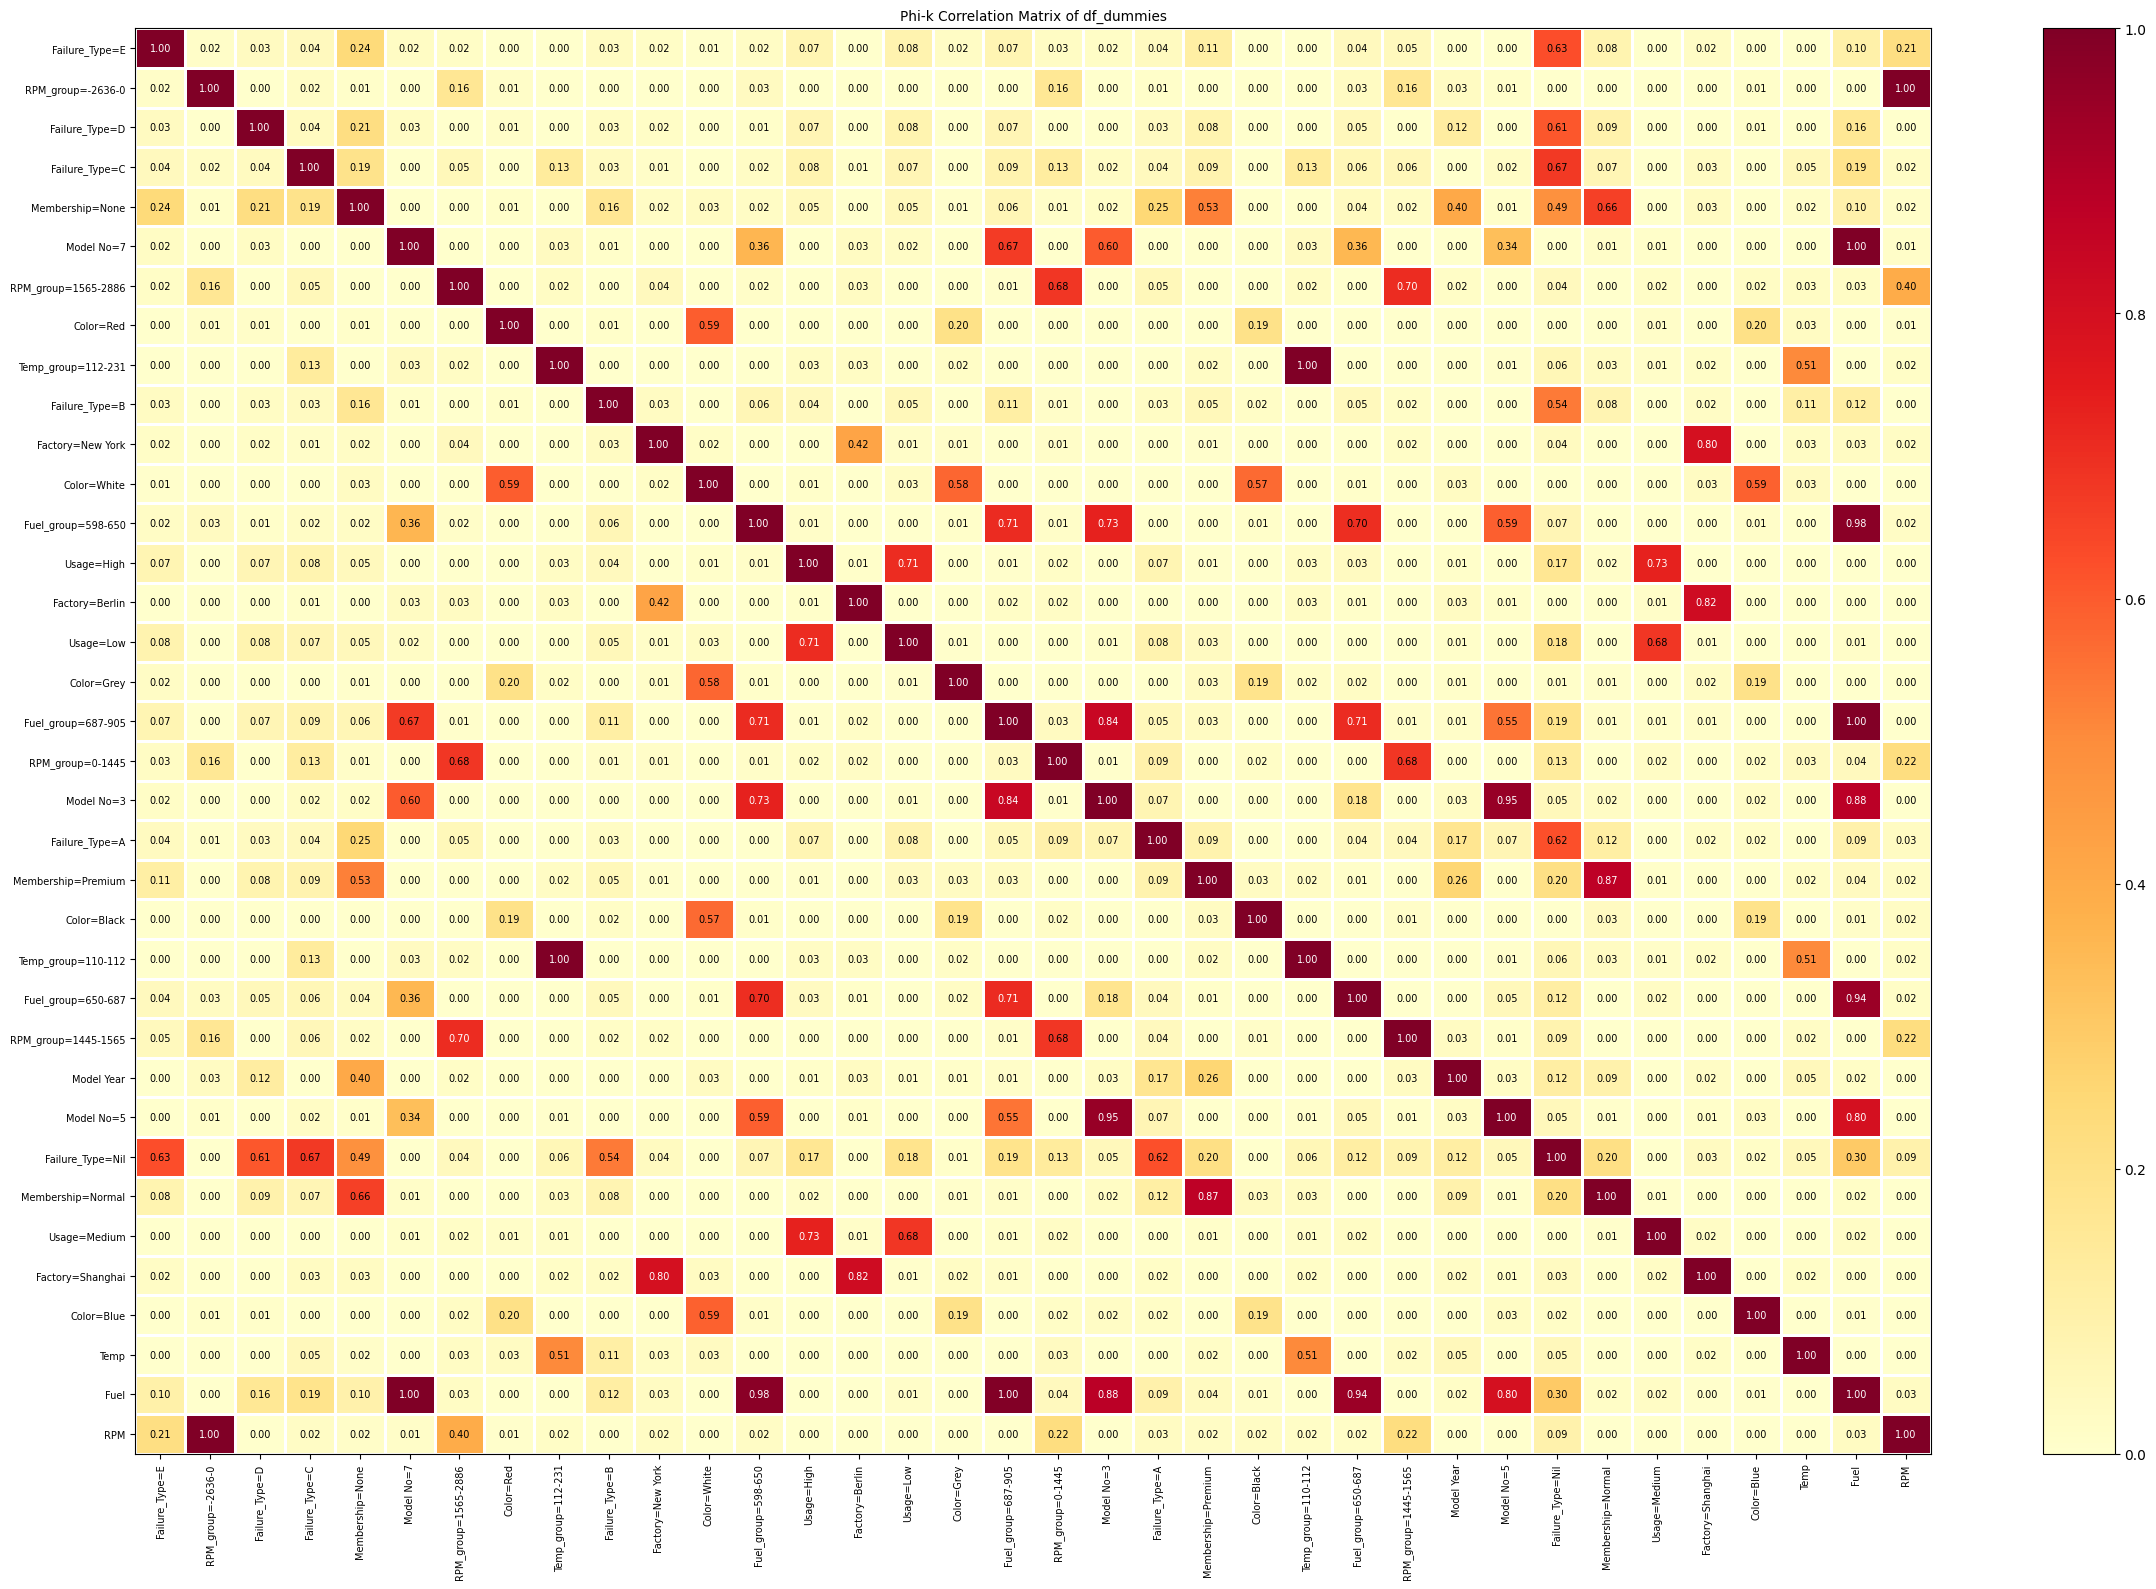

In [251]:
df_dummies_phik_matrix = df_dummies.phik_matrix(interval_cols=cts_variables)

phik.report.plot_correlation_matrix(
    df_dummies_phik_matrix.values, 
    x_labels=list(df_dummies.columns), 
    y_labels=list(df_dummies.columns),
    print_both_numbers=False, 
    figsize=(24,16), 
    vmin=0, 
    vmax=1, 
    color_map='YlOrRd', 
    fontsize_factor=0.7, 
    title="Phi-k Correlation Matrix of df_dummies")
plt.show()

In [252]:
np.round(df_phik_matrix[['Fuel']].sort_values(by='Fuel', ascending=False, axis=0).iloc[1:8,:].T,3)

,Model No=7,Fuel_group=687-905,Fuel_group=598-650,Fuel_group=650-687,Model No=3,Model No=5,Failure_Type=Nil
Fuel,0.998,0.996,0.977,0.944,0.876,0.797,0.297


Since the factors of Membership=None and Fuel, appear to be indicative features for predicting car failure, let us analyse the phik correlation matrix to find which are the factors correlated to them:
- Membership=None:  `Model Year` (after discounting other membership types and Failure_Types) 
- Fuel: `Model No=7, Model No=3, Model No=5` (after discounting other Fuel_groups and Failure_Type=Nil) 

# 6.Training ML Models with Imbalanced Class Treatment



## 6.1. Choice of Machine Learning Classification Algorithms

In this notebook, we have chosen the classifiers to be trained as XGBoost, Decision Tree, CatBoost, Random Forest. There are several reasons why one might choose to use these algorithms over logistic regression in this specific case.

XGBoost: XGBoost is a gradient boosting algorithm that is particularly effective for working with large datasets and high-dimensional feature spaces. It can also handle missing values, and is known for its robustness and high accuracy.

Decision Tree: Decision Trees are simple to understand and interpret, and can be used for both classification and regression tasks. They are able to handle categorical variables and non-linearly separable data well.

CatBoost: CatBoost is a gradient boosting algorithm that is designed for working with categorical variables, which is often the case in datasets. It can handle missing values and categorical variables without the need to preprocess the data, and is known for its robustness and high accuracy.

Random Forest: Random Forests are an ensemble method that builds multiple decision trees and combines their predictions to improve the overall accuracy and control over-fitting. Random Forests are generally more robust to noise, outliers and missing data.

While Logistic Regression is a simple and interpretable algorithm, it is limited to linear decision boundaries which may not be suitable for some datasets. These algorithms are more flexible and can handle non-linear decision boundaries and handle categorical variables, missing data and outliers better.

In this specific case where the dataset is imbalanced and contains categorical variables and missing data, these algorithms are more suitable than logistic regression.

Logistic regression is generally slower compared to tree-based and boosted tree algorithms, especially when working with oversampled data. This is because tree-based and boosted tree algorithms are able to handle large datasets and high-dimensional feature spaces more efficiently than logistic regression.

In oversampled data, the number of data points increases significantly, and logistic regression can take longer to fit the model to the larger dataset and more so if regularization is involved (which we initally performed but decided at the end to drop this model due to time constraints to achieve good algorithmic convergence), while tree-based and boosted tree algorithms can handle the larger dataset size more quickly.

Additionally, the tree-based and boosted tree algorithms can handle non-linear decision boundaries and categorical variables more effectively than logistic regression, which is especially important when working with imbalanced and oversampled data.

In [253]:
import pickle
import scipy
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Create the parameter grids for each classification algorithm to be used
xgb_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1.00, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50),
    'clf__alpha': np.arange(0, 50, 5),
    'clf__tree_method': ['hist'],
    'clf__enable_categorical': [True],
    'clf__gpu_id': [-1],
    }

lr_param_grid = {
    'clf__C': np.arange(1, 51, 2.5),
    'clf__penalty': ['l1'],
    'clf__solver': ['liblinear'],
    'clf__max_iter': [1000], 
    'clf__tol': [0.001], 
    }

dt_param_grid = {
    'clf__max_depth': [2, 3, 5, 10],
    'clf__min_samples_leaf': [5, 10, 20, 50],
    'clf__criterion': ["gini", "entropy"]
    }

ctb_param_grid = {
    'clf__depth': [4, 6, 8],
    'clf__learning_rate': [0.01, 0.02, 0.04],
    'clf__iterations': np.arange(50, 200, 50),
    'clf__verbose': [False]
                 }

rf_param_grid = { 
    'clf__n_estimators': np.arange(50, 200, 50),
    'clf__max_features': ['sqrt', 'log2'],
    'clf__max_depth' : [4, 6, 8],
    'clf__criterion' :['gini', 'entropy']
}

## 6.2. SVMSMOTE & ML with cross-validation

Imbalanced datasets are those in which the number of samples in one class is significantly larger than the number of samples in other classes. This can cause problems when training machine learning models, as the model may be biased towards the majority class.

SVMSMOTE is a package that can be used to treat imbalanced datasets before training machine learning models. SVMSMOTE is a variant of the Synthetic Minority Over-sampling Technique (SMOTE) algorithm. The original SMOTE algorithm creates synthetic samples by interpolating between existing minority class samples. SVMSMOTE, on the other hand, uses support vector machines (SVMs) to create synthetic samples. This allows SVMSMOTE to better identify the decision boundary between the minority and majority classes, and thus create more realistic synthetic samples.

In addition to better identifying the decision boundary, SVMSMOTE also addresses the problem of over-sampling in high-dimensional space by generating samples on the sparse region of the minority class. This can help to prevent over-fitting and improve the generalization of the trained model.

Therefore, in the following we shall use SVMSMOTE to treat imbalanced datasets can help to improve the performance of machine learning models by reducing bias towards the majority class and creating more realistic synthetic samples.

The code provided for the classifer training function shows the steps for integrating SVMSMOTE with various machine learning algorithms (XGBClassifier, DecisionTreeClassifier, CatBoostClassifier, RandomForestClassifier) to handle imbalanced datasets. The steps are as follows:

- Import the necessary libraries and modules, including SVMSMOTE from the imbalanced-learn library.
- Create an instance of the SVMSMOTE class, specifying the sampling strategy, number of neighbors and random state.
- Create a pipeline for each machine learning algorithm, where the first step is the SVMSMOTE step, followed by the algorithm itself.
- Create a list of pipelines, with each pipeline containing a tuple of the algorithm name, the pipeline object, and the corresponding algorithm's parameter grid.
- Use a loop to iterate through the pipelines and pass the X_train and y_train datasets to the fit method of each pipeline.
- This way SVMSMOTE is used as a preprocessing step before training the machine learning model, it is oversampling the minority class and the model is trained with the balanced dataset.
- In this specific case, the sampling strategy is set to 'not majority' which means the minority class will be oversampled. This is because the dataset is imbalanced and oversampling the minority class can improve the performance of the machine learning model.

In the provided code, SVMSMOTE is incorporated into the pipeline in a way that is designed to prevent overfitting. This is done by using the KFold class from the sklearn.model_selection module to perform k-fold cross-validation on the dataset.

K-fold cross-validation is a technique for evaluating machine learning models that involves partitioning the data into k equally sized "folds", and training the model k times, each time using a different fold as the validation set and the remaining k-1 folds as the training set.

In this case, the KFold class is used to split the data into 5 folds, with each fold being used as the validation set once. The random_state parameter is set to 42 to ensure the same splits are used each time the code is run.

When the pipeline is fit to the data, the SVMSMOTE step is applied to each fold separately, and the model is trained on the oversampled data for each fold. This means that the model is not trained on the same data every time, which can help prevent overfitting. Additionally, the random state is set to 42 for SVMSMOTE to ensure that the same synthetic samples are generated for each fold

By incorporating SVMSMOTE into the pipeline in this way, the code is able to balance the dataset for each fold of the cross-validation process, which can improve the performance of the model and prevent overfitting.

In [254]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import imblearn.pipeline
from imblearn.over_sampling import SVMSMOTE

def train_models_with_SVMSMOTE(X, y, xgb_param_grid, dt_param_grid, ctb_param_grid, rf_param_grid, scoring = 'f1_macro', n_iter = 20):
    
    if np.unique(y).shape[0] == 2:
        clftype = 'binary'
    elif np.unique(y).shape[0] >= 3:
        clftype = 'multiclass'
    else: 
        ValueError("There must be at least 2 classes to train a classifier!")
    
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    sm = SVMSMOTE(sampling_strategy='not majority', k_neighbors=1, random_state=42)

    xgb_steps = [('SVMSMOTE', sm), ('clf', XGBClassifier(random_state=42))]
    dt_steps = [('SVMSMOTE', sm), ('clf', DecisionTreeClassifier(random_state=42))]
    ctb_steps = [('SVMSMOTE', sm), ('clf', CatBoostClassifier(random_state=42))]
    rf_steps = [('SVMSMOTE', sm), ('clf', RandomForestClassifier(random_state=42))]

    xgb_imba_pipeline = imblearn.pipeline.Pipeline(steps=xgb_steps)
    dt_imba_pipeline = imblearn.pipeline.Pipeline(steps=dt_steps)
    ctb_imba_pipeline = imblearn.pipeline.Pipeline(steps=ctb_steps)
    rf_imba_pipeline = imblearn.pipeline.Pipeline(steps=rf_steps)

    pipelines = []
    pipelines.append(('XGB', xgb_imba_pipeline, xgb_param_grid))
    pipelines.append(('DT', dt_imba_pipeline, dt_param_grid))
    pipelines.append(('CatB', ctb_imba_pipeline, ctb_param_grid))
    pipelines.append(('RF', rf_imba_pipeline, rf_param_grid))

    model_names = []
    results = []
    records = []
    best_score_params = []

    for name, pipeline, param_grid in pipelines:
        grid = RandomizedSearchCV(
            estimator=pipeline, 
            cv=kf, 
            n_iter=n_iter, 
            scoring=scoring, 
            verbose=0, 
            param_distributions=param_grid, 
            random_state=42)
        grid.fit(X, y)
        cv_results = grid.cv_results_['mean_test_score']
        results.append(cv_results)
        records.append((name, cv_results.mean(), cv_results.std()))
        model_names.append(name)
        # save model with pickle locally
        model_filename = 'models/' + clftype + name + '_' + str(scoring) + '_rs_cv_model.sav'
        pickle.dump(grid, open(model_filename, 'wb'))
        # WRITE model as pickle file to S3 Bucket
        with tempfile.TemporaryFile() as fp:
            pickle.dump(grid, fp)
            fp.seek(0)
            # use bucket_name and OutputFile - s3 location path in string format.
            s3.Bucket(AWS_S3_BUCKET).put_object(Key=model_filename, Body=fp.read())
        fp.close() 
        # WRITE records as pickle file to S3 Bucket
        records_filename = 'models/' + clftype + '_' + str(scoring) + '_rs_cv_records.sav'
        with tempfile.TemporaryFile() as fp1:
            pickle.dump(records, fp1)
            fp1.seek(0)
            # use bucket_name and OutputFile - s3 location path in string format.
            s3.Bucket(AWS_S3_BUCKET).put_object(Key=records_filename, Body=fp1.read())
        fp1.close() 
        best_score_params.append([name, grid.best_score_, grid.best_params_])
        msg = "%s: Score Mean %f , Score Std (%f)" % (model_names, cv_results.mean(), cv_results.std())
        print(msg)
        # Compare different Algorithms
    fig = plt.figure(figsize=[8, 6])
    fig.suptitle('Algorithm Classification Performance Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(model_names)
    plt.xlabel("Models", fontsize=12)
    plt.ylabel(str(scoring) + "_score", fontsize=12)
    plt.show()
    return model_names, results, records, best_score_params

# 7.Binary Classifiers, Evaluation & SHAP Feature Importance

In this section, we shall explore in 3 subsections our findings for binary classification performances of car failure on the train/cross-validated dataset, our evaluation of the predictive performances of the trained models on the test dataset, and finally perform SHAP analysis to obtain the top feature importances for car failure.

## 7.1. Binary Classification of Car Failure (vs No-Failure)

The performances of the 4 binary classification algorithms on the train dataset are ranked (from top to bottom) in terms of mean f1-macro score as follows:
1. XGBoost Classifier: 0.740987
2. CatBoost Classifier: 0.716806
3. Random Forest Classifier: 0.696343
4. Decision Tree Classifier: 0.672343

Visualisations of their overall performances can be observed in the boxplot below.
We next proceed to perform evaluation of the predictive performances of the trained models on the test dataset, before concluding our final top choice of the classifer for this binary classification task.

['XGB']: Score Mean 0.740987 , Score Std (0.008767)
['XGB', 'DT']: Score Mean 0.672343 , Score Std (0.012384)
['XGB', 'DT', 'CatB']: Score Mean 0.716806 , Score Std (0.014745)
['XGB', 'DT', 'CatB', 'RF']: Score Mean 0.696343 , Score Std (0.008370)


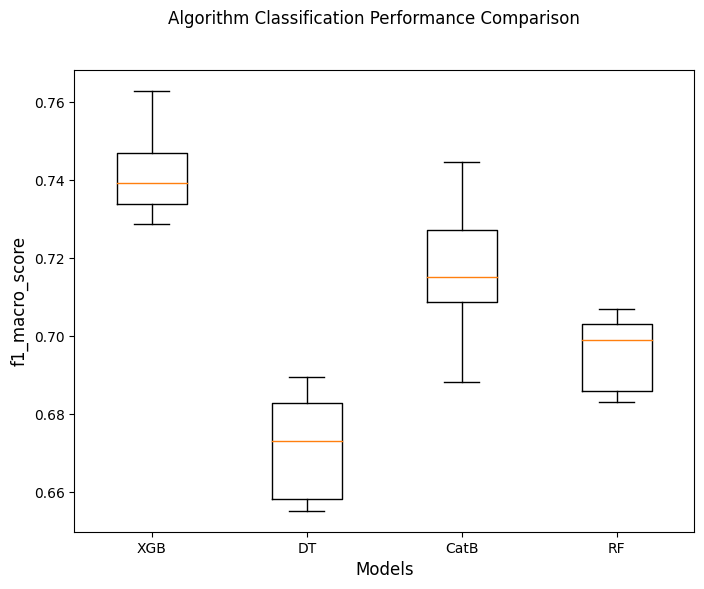

In [255]:
# Binary class 0: Non-failure, 1: failure
target_var = 'Has_Failure' 
df['Has_Failure'] = 1 - df['No-Failure']
y = LabelEncoder().fit_transform(df[target_var]).ravel()

n_iters = 20
scoring = 'f1_macro'
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42, stratify=y)

model_names, results, records, best_score_params = train_models_with_SVMSMOTE(
    X_train, 
    y_train, 
    xgb_param_grid, 
    dt_param_grid, 
    ctb_param_grid, 
    rf_param_grid, 
    scoring = scoring, 
    n_iter = n_iters)

## 7.2. Evaluation

In this section, we write a python function script to evaluate the predictive performances of the trained models on the test dataset for the binary classification task of detecting car failure. This function would be used again for the multiclass classfication task later in Section 8.2.

Interestingly, from the classification report on the test dataset below, we find that the CatBoost binary classifer to be ranked top this time in terms of metrics f1-score, recall, kappa (but a rather close 2nd for the metrics of overall accuracy and precision). This can also be confirmed by a comparison of CatBoost and XGBoost's confusion matrices below. 
|CatBoost |precision|recall|f1-score|support|
|-----|-----|-----|-----|-----|
|No-failure|0.94|0.96|0.95|1748|
|Has-failure|0.67|0.56|0.61|252|
| | | | | |
|accuracy|||0.91|2000|
|macro avg|       0.80|      0.76 |     0.78 |     2000|
|weighted avg|       0.90|      0.91|      0.91|      2000|

In view of this, we shall select the CatBoost binary classifer as our current top model for inference, followed by XGBoost and Random Forest binary classifers as the remaining 2 models as alternatives.

A plausible reason for CatBoost binary classifer to be the top performer could be that the transformed dataset has a large proportion of categorical and ordinal features which have been remarked by many practioneers to be favourable to improve its performance. 

That said, this is still a challenging dataset given the class imbalance proportions, which I think more work can be done to investigate whether this model can be further improved  especially for the positive class (Has-failure) recall without sacrificing the overall balance between precision and recall. A minor point to note is that top of that, the overall accuracy rate has also improved by 4% compared to the dummy classifer (87%) although we emphasise that accuracy is not the key evaluation metric we have chosen. 

We now move on to using SHAP analysis to obtain the top feature importances of the CatBoost binary classifier in the context of car failure detection.

In [256]:
from sklearn.metrics import classification_report, roc_auc_score, cohen_kappa_score, matthews_corrcoef
def evaluate_models(clfr_type, model_names, scoring, X_test, y_test, records, s3, AWS_S3_BUCKET):
    # Load the models from S3 and make predictions
    model_preds = [pickle.loads(s3.Bucket(AWS_S3_BUCKET).Object('models/' + clfr_type + model + '_' + str(scoring) + '_rs_cv_model.sav').get()['Body'].read()).predict_proba(X_test) for model in model_names]
    models_dict = dict(zip(model_names, model_preds))

    # Create a dictionary to store the performance metrics for each model
    metrics = {}

    # Calculate the performance metrics for each model
    for name, y_probs in models_dict.items():
        y_pred = np.argmax(y_probs, axis=1)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
        metrics[name] = {
            'Accuracy': report['accuracy'],
            'Recall': report['macro avg']['recall'],
            'Prec.': report['macro avg']['precision'],
            'F1': report['macro avg']['f1-score'],
            'Kappa': cohen_kappa_score(y_test, y_pred),
            'MCC': matthews_corrcoef(y_test, y_pred)
            }

    # Create a DataFrame from the metrics dictionary
    clf_report_df = np.round(pd.DataFrame.from_dict(metrics, orient='index'),3)

    train_results_means = np.array([records[i][1] for i in range(0,len(model_names))])
    train_results_std = np.array([records[i][2] for i in range(0,len(model_names))])
    if len(str(scoring).upper().split('_')) == 2:
        scr = str(scoring).upper().split('_')[1]
    elif len(str(scoring).upper().split('_')) == 1:
        scr = str(scoring).upper()
    else: 
        ValueError

    # Combing train and test prediction overall results as a dataframe, train_test_results_df
    train_results_df = np.round(pd.DataFrame({scr + ' Mean': train_results_means, scr + ' Std': train_results_std}, index=model_names), 3)
    train_results_df.columns = pd.MultiIndex.from_product([['Train_Results'], train_results_df.columns])
    clf_report_df.columns = pd.MultiIndex.from_product([['Validation_Results'], clf_report_df.columns])
    train_test_results_df = pd.concat([train_results_df, clf_report_df], axis = 1)
    # Save the train_test_results_df dataframe train-test-prediction results to a CSV file
    train_test_results_df.to_csv('models/' + clfr_type + str(scoring) + '_rscv_clfs_report.csv', index=True)
    csvfilename = 'models/' + clfr_type + str(scoring) + '_rscv_clfs_report.csv'
    csv_buffer = StringIO()
    train_test_results_df.to_csv(csv_buffer)
    s3.Object(AWS_S3_BUCKET, csvfilename).put(Body=csv_buffer.getvalue())
    print(train_test_results_df)

In [257]:
# Need to re-define all inputs if define new python script (we may need only for predict test)
# Need to save model_names, records
clfr_type = 'binary'
scoring = 'f1_macro'
records = pickle.loads(s3.Bucket(AWS_S3_BUCKET).Object('models/' + clfr_type + '_' + str(scoring) + '_rs_cv_records.sav').get()['Body'].read())
evaluate_models(clfr_type, model_names, scoring, X_test, y_test, records, s3, AWS_S3_BUCKET)

     Train_Results           Validation_Results                              \
        MACRO Mean MACRO Std           Accuracy Recall  Prec.     F1  Kappa   
XGB          0.741     0.009              0.916  0.735  0.843  0.775  0.552   
DT           0.672     0.012              0.850  0.716  0.678  0.694  0.389   
CatB         0.717     0.015              0.909  0.758  0.802  0.777  0.555   
RF           0.696     0.008              0.851  0.743  0.686  0.708  0.418   

             
        MCC  
XGB   0.567  
DT    0.392  
CatB  0.558  
RF    0.426  


In [258]:
from sklearn.metrics import confusion_matrix
import botocore
def model_predict(clfr_type, chosen_model, scoring, X_test, y_test, s3, AWS_S3_BUCKET):
    try:
        model_name = 'models/' + clfr_type + chosen_model + '_' + str(scoring) + '_rs_cv_model.sav'
        xgb_f1_macro_model = pickle.loads(s3.Bucket(AWS_S3_BUCKET).Object(model_name).get()['Body'].read())
        y_prob = xgb_f1_macro_model.predict_proba(X_test)
        y_pred = np.argmax(y_prob, axis=1)
        if y_test is not None:
            if clfr_type == "binary":
                cm_matrix_labels = ['No-failure', 'Has-failure']
            elif clfr_type == "multiclass":
                cm_matrix_labels = ['A', 'B', 'C', 'D', 'E', 'No-failure']
            else:
                cm_matrix_labels = None
            report = classification_report(y_test, y_pred, output_dict=False, zero_division=1, target_names = cm_matrix_labels)
            matrix_confusion = confusion_matrix(y_test, y_pred)
            ax= plt.subplot()
            sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
            ax.set_xlabel('Predicted labels');
            ax.set_ylabel('True labels'); 
            ax.set_title('Confusion Matrix'); 
            ax.xaxis.set_ticklabels(cm_matrix_labels); ax.yaxis.set_ticklabels(cm_matrix_labels);
            plt.show()
            print(report)
        else:
            print("No y_test provided, unable to generate confusion matrix and classification report")
    except botocore.exceptions.ClientError as e:
        if e.response['Error']['Code'] == "NoSuchKey":
            print(f'Model not found in {AWS_S3_BUCKET}')
        else:
            raise

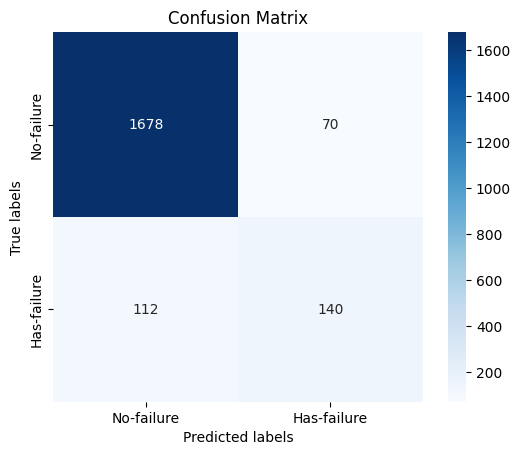

              precision    recall  f1-score   support

  No-failure       0.94      0.96      0.95      1748
 Has-failure       0.67      0.56      0.61       252

    accuracy                           0.91      2000
   macro avg       0.80      0.76      0.78      2000
weighted avg       0.90      0.91      0.91      2000



In [259]:
# Confusion Matrix & Classification Report results for CatBoost binary classifer (shown below)
clfr_type = 'binary'
chosen_model ='CatB' 
model_predict(clfr_type, chosen_model, scoring, X_test, y_test, s3, AWS_S3_BUCKET)

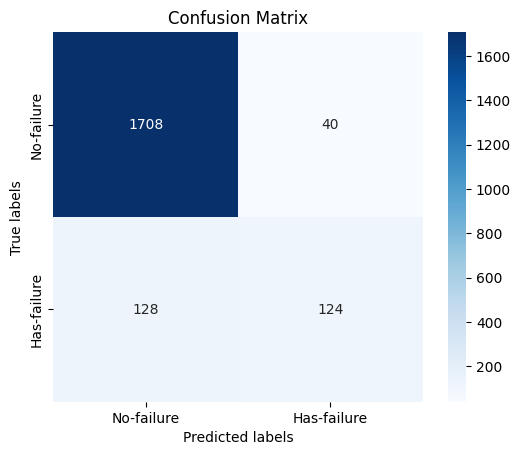

              precision    recall  f1-score   support

  No-failure       0.93      0.98      0.95      1748
 Has-failure       0.76      0.49      0.60       252

    accuracy                           0.92      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.91      0.92      0.91      2000



In [260]:
# Confusion Matrix & Classification Report results for XGBoost binary classifer (shown below)
clfr_type = 'binary'
chosen_model ='XGB' 
model_predict(clfr_type, chosen_model, scoring, X_test, y_test, s3, AWS_S3_BUCKET)

## 7.3. SHAP Feature Importances Analysis & Recommendations

From the diagram below, for the `Category I: Binary Class` - `Has Failure`, the top 3 groups of feature importances derived from SHAP analysis of the top model (CatBoost binary classifer) for the company to deliberate mitigative measures are as follows:

1. `Membership = None`: Cars owned by non-members have a strong tendency to impact the trained model's classification of cars in the test dataset as having faults, relative to cars owned by members. In view of this, it might be in the favour of the car company to use findings of this study to more actively persuade customers to continue their membership to maintain regular servicing to lessen the possibilty of potential of car failure.

2. `Fuel Consumption`: Cars with higher fuel consumption tend to influence the trained model to classify cars in the test dataset as having faults, compared to cars with lower fuel consumption. This is not that surprisingly on hindsight and could be mitigated with regular servicing as mentioned in point 1 above.

3. `Model` 
    -   (a) `Model Year`: Newer cars appear to affect the trained model's classification of cars in the test dataset as having no faults, with about 70% of newer cars having this impact, compared to older cars. However, a small proportion of older cars, less than 30%, seem to influence the model to classify cars as having faults, which is in our opinion rather natural.
    -   (b) `Model No=3`: Cars of Model No. 3 seem to attribute more strongly to the trained model's classification of cars in the test dataset as having faults, compared to cars of other models. Although it is understandable that a sizable proportion of such cars are of a older make, the car company might wish to look more closely if this can be mitigated with early detection measures.

In [261]:
import shap

def plot_shap_summary(shap_values, X_test, feature_names_array):
    if shap_values[0].ndim == 1:
        reshaped_shap_values = shap_values
        plt.figure(figsize=(10,6), dpi=150)
        plt.suptitle("Feature Importance for Binary Target Variable ", fontsize=16)
        shap.summary_plot(reshaped_shap_values, X_test, feature_names=list(feature_names_array), max_display=10, plot_type='dot')
        plt.show()
    else:
        plt.figure(figsize=(10,6), dpi=150)
        for idx, shap_value in enumerate(shap_values):
            plt.suptitle("Feature Importance for Target Variable {}".format(idx), fontsize=16)
            shap.summary_plot(shap_value, X_test, feature_names=list(feature_names_array), max_display=10, plot_type='dot')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


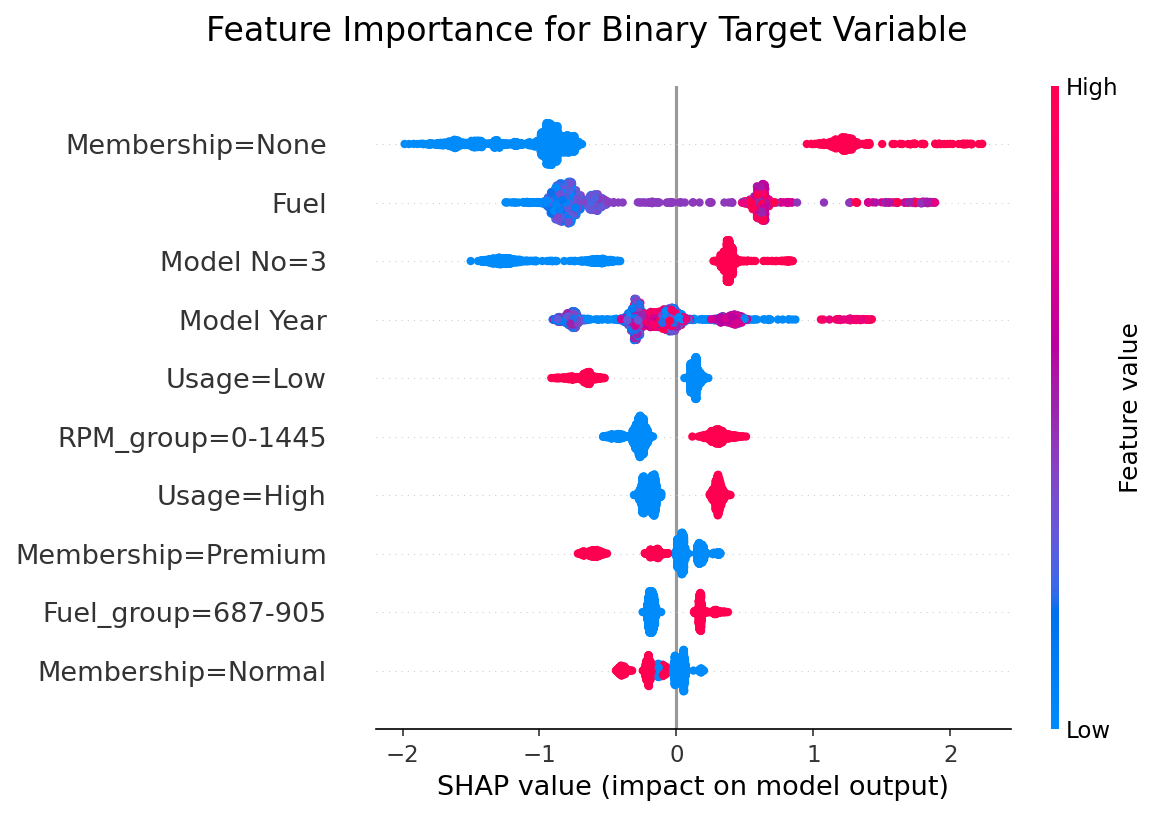

In [262]:
# Example SHAP function usage
chosen_model = 'CatB'
clfr_type = 'binary'

feature_names_array = np.array(list(X3.columns))
idxs = feature_names_array

model_name = 'models/' + clfr_type + chosen_model + '_' + str(scoring) + '_rs_cv_model.sav'
xgb_f1_macro_model = pickle.loads(s3.Bucket(AWS_S3_BUCKET).Object(model_name).get()['Body'].read())

# xgb_f1_macro_model = pickle.load(open(chosen_model + '_' + str(scoring) + '_rs_cv_model.sav','rb'))
xgb_f1_macro_model_explainer = shap.TreeExplainer(xgb_f1_macro_model.best_estimator_.named_steps["clf"])
xgb_f1_macro_shap_values = xgb_f1_macro_model_explainer.shap_values(X_test)
plot_shap_summary(xgb_f1_macro_shap_values, X_test, feature_names_array)

# 8.Multilabel Classifers, Evaluation & SHAP Feature Importances

We now move on to the more challenging task of multiclass classification in the context of identifying potential features to formulate mitigative measures for the particular fault type. 

It must be cautioned that due to the larger imbalanced of the fault types (about 2.5% each for the 5 failure types A-E), the precision and recall of each failure type class for the multiclass classifers are relatively much lower (about 20-30%) when compared to the binary fault class in Section 7. Nevertheless we present our findings below based on our baseline classifer to see if any clues or insights can be obtained below for each fault type.

## 8.1. Multilabel Classification

We first perform label encoding on the target vector prior to fitting the data, labels pairs to multi-classification using our model training function defined earlier.

The performances of the 4 multiclass classification algorithms on the train dataset are ranked (from top to bottom) in terms of mean f1-macro score as follows:
1. XGBoost Classifier: 0.315351
2. CatBoost Classifier: 0.244944 
3. Random Forest Classifier: 0.278448 
4. Decision Tree Classifier: 0.275416

Visualisations of their overall performances can be observed in the boxplot below.
We next proceed to perform evaluation of the predictive performances of the trained models on the test dataset, before concluding our final top choice of the classifer for this binary classification task.

['XGB']: Score Mean 0.315351 , Score Std (0.006605)
['XGB', 'DT']: Score Mean 0.244944 , Score Std (0.028352)
['XGB', 'DT', 'CatB']: Score Mean 0.278448 , Score Std (0.010339)
['XGB', 'DT', 'CatB', 'RF']: Score Mean 0.275416 , Score Std (0.014398)


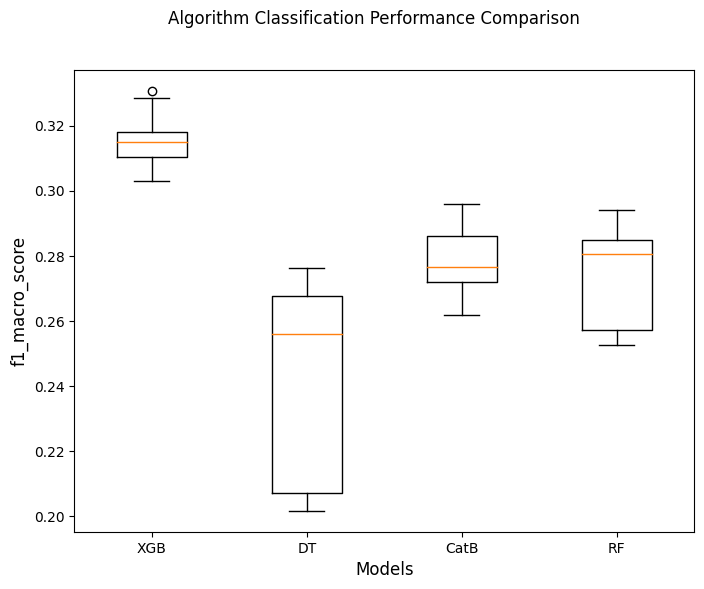

In [263]:
# Multiclass A,B,C,D,E,No-failure encoded as 0,1,2,3,4,5
target_var = 'Failure_Type'
multilabelencoder = LabelEncoder()
df[target_var] = multilabelencoder.fit_transform(df[target_var])
df[target_var] = df[target_var].astype('category')
y = df[target_var].to_numpy().ravel()

n_iters = 20
scoring = 'f1_macro'
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42, stratify=y)

model_names, results, records, best_score_params = train_models_with_SVMSMOTE(
    X_train, 
    y_train, 
    xgb_param_grid, 
    dt_param_grid, 
    ctb_param_grid, 
    rf_param_grid, 
    scoring = scoring, 
    n_iter = n_iters)

## 8.2. Evaluation

In this subsection, we use the same python  model-evaluator function defined earlier to evaluate the predictive performances of the trained models on the test dataset for the multiclass classification task of detecting car failure.

From the classification report on the test dataset below, this time we find that the XGBoost multiclass classifer to be ranked top this time in terms of evaluaton metric used. This is followed by CatBoost and the Random Forest classifers, though this ranking may not be as meaningful given the lower rates of precision and recall in each of the fault type classes.

Nevertheless, we go on to using SHAP analysis to see what are regarded as the top feature importances of the XGBoost multiclass classifier in the context of multi-type car failure detection.

In [264]:
clfr_type = 'multiclass'
scoring = 'f1_macro'
records = pickle.loads(s3.Bucket(AWS_S3_BUCKET).Object('models/' + clfr_type + '_' + str(scoring) + '_rs_cv_records.sav').get()['Body'].read())
evaluate_models(clfr_type, model_names, scoring, X_test, y_test, records, s3, AWS_S3_BUCKET)

     Train_Results           Validation_Results                              \
        MACRO Mean MACRO Std           Accuracy Recall  Prec.     F1  Kappa   
XGB          0.315     0.007              0.884  0.319  0.436  0.359  0.381   
DT           0.245     0.028              0.750  0.283  0.256  0.251  0.199   
CatB         0.278     0.010              0.816  0.301  0.283  0.291  0.271   
RF           0.275     0.014              0.820  0.295  0.289  0.289  0.265   

             
        MCC  
XGB   0.399  
DT    0.211  
CatB  0.272  
RF    0.266  


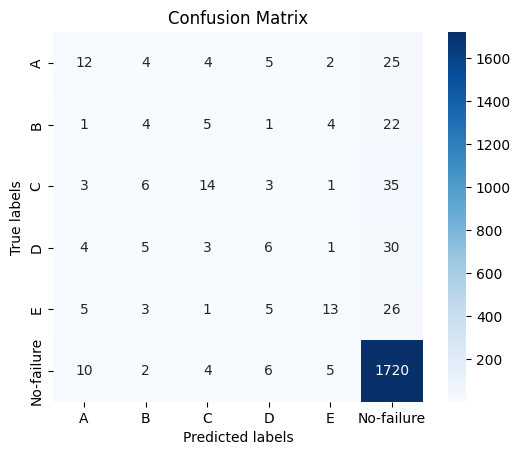

              precision    recall  f1-score   support

           A       0.34      0.23      0.28        52
           B       0.17      0.11      0.13        37
           C       0.45      0.23      0.30        62
           D       0.23      0.12      0.16        49
           E       0.50      0.25      0.33        53
  No-failure       0.93      0.98      0.95      1747

    accuracy                           0.88      2000
   macro avg       0.44      0.32      0.36      2000
weighted avg       0.85      0.88      0.87      2000



In [265]:
clfr_type = 'multiclass'
chosen_model = 'XGB'
model_predict(clfr_type, chosen_model, scoring, X_test, y_test, s3, AWS_S3_BUCKET)

In [266]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RPM                  10000 non-null  float64
 1   Fuel                 10000 non-null  float64
 2   Temp                 10000 non-null  float64
 3   Color=Blue           10000 non-null  float64
 4   Factory=Shanghai     10000 non-null  float64
 5   Usage=Medium         10000 non-null  float64
 6   Membership=Normal    10000 non-null  float64
 7   Model No=5           10000 non-null  float64
 8   Model Year           10000 non-null  float64
 9   RPM_group=1445-1565  10000 non-null  float64
 10  Fuel_group=650-687   10000 non-null  float64
 11  Temp_group=110-112   10000 non-null  float64
 12  Color=Black          10000 non-null  float64
 13  Membership=Premium   10000 non-null  float64
 14  Model No=3           10000 non-null  float64
 15  RPM_group=0-1445     10000 non-null  

## 8.3. SHAP Feature Importance for Each Class

Overall, we end off by saying that the findings of top feature importances here for the multiclass situation appear to reinforce our earlier findings of the binary classifer, and as well as the recommendations, which is that either `Model Year` and/or `Membership=None` remain among the top 3 feature importances of each failure type class.

Note that the feature `Model Year` is moderately correlated to the feature of `Membership=None` with phi-k correlation coefficient of 0.4 (see section 5). A check with the Pearson correlation coefficient reveals that this correlation is negative in nature (-0.248), which indicates that no membership correlates with cars with a older Model Year make. 

 The details of SHAP analysis of top feature importances each of the classes are given below


For `Category II: Multi-class` - `Failure_Type`, for each class, the top 3 groups of feature importances derived from SHAP analysis of the top model (XGBoost) are as follows:



- Class 0 (Failure Type A):
    1. `Model Year`
    2. `Membership=None`
    3. `RPM`

- Class 1 (Failure Type B):
    1. `Fuel consumption`
    2. `Model Year`
    3. `RPM`


- Class 2 (Failure Type C):
    1. `Temperature`
    2. `Model Year`
    3. `RPM`

- Class 3 (Failure Type D):
    1. `Model Year`
    2. `Fuel consumption`
    3. `RPM`

- Class 4 (Failure Type E):
    1. `RPM`
    2. `Model Year`
    3. `Fuel consumption`

- Class 5 (No-failure):
    1. `Membership=None`
    2. `Fuel consumption`
    3. `Model No=3`, `Model Year`

In [267]:
X3[['Membership=None', 'Model Year']].corr()

,Membership=None,Model Year
Membership=None,1.000000,-0.247866
Model Year,-0.247866,1.000000


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


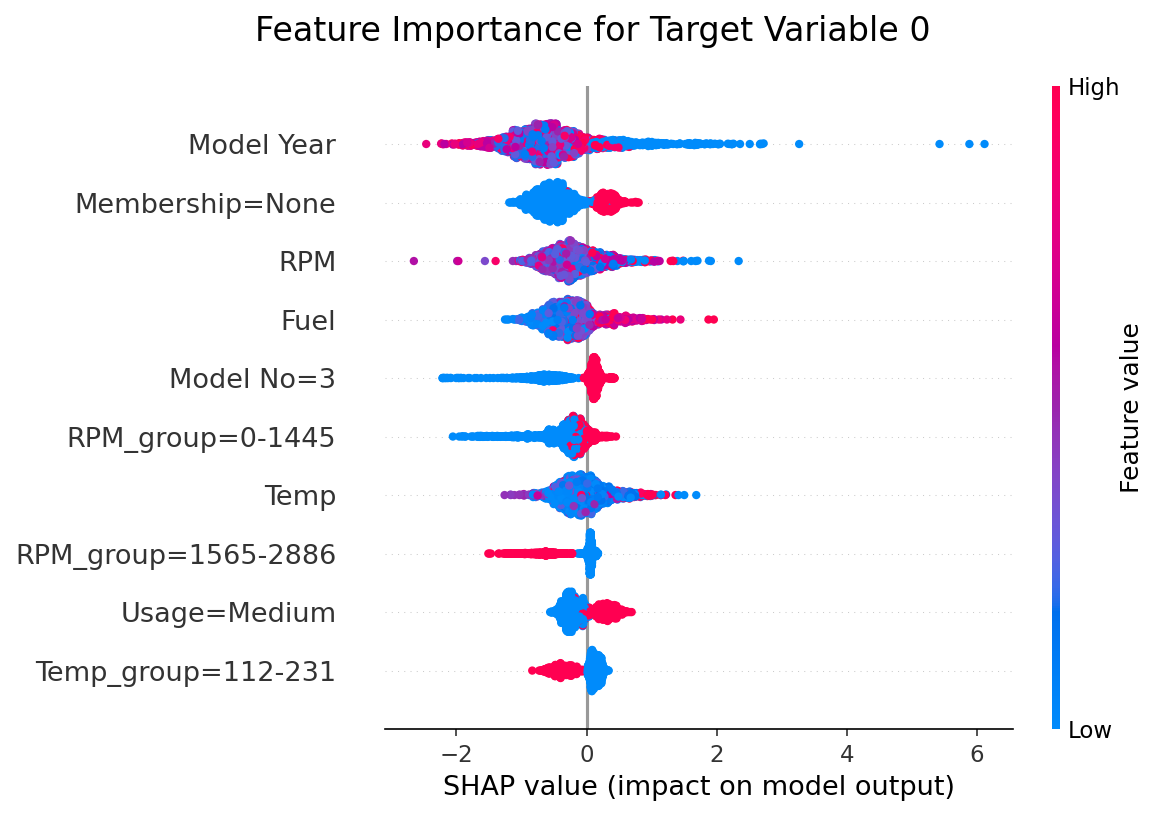

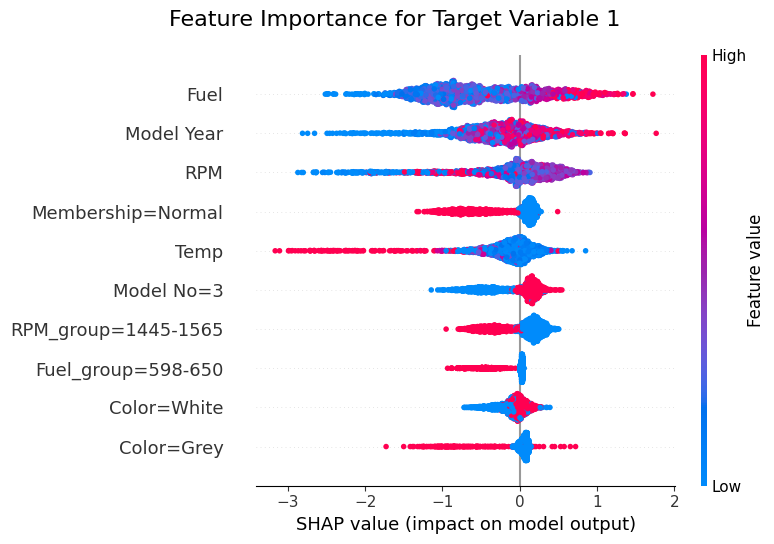

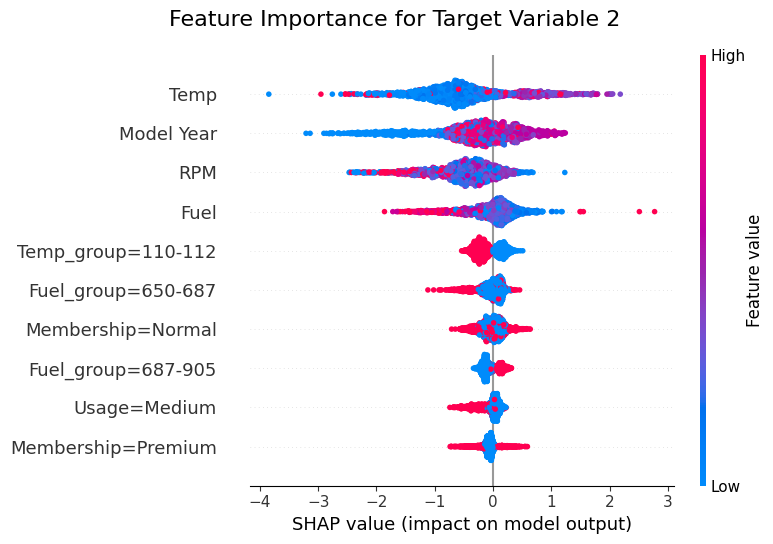

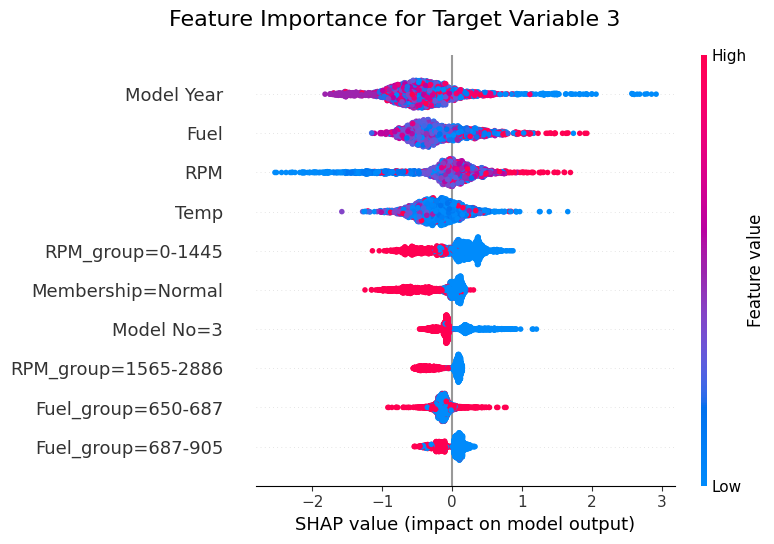

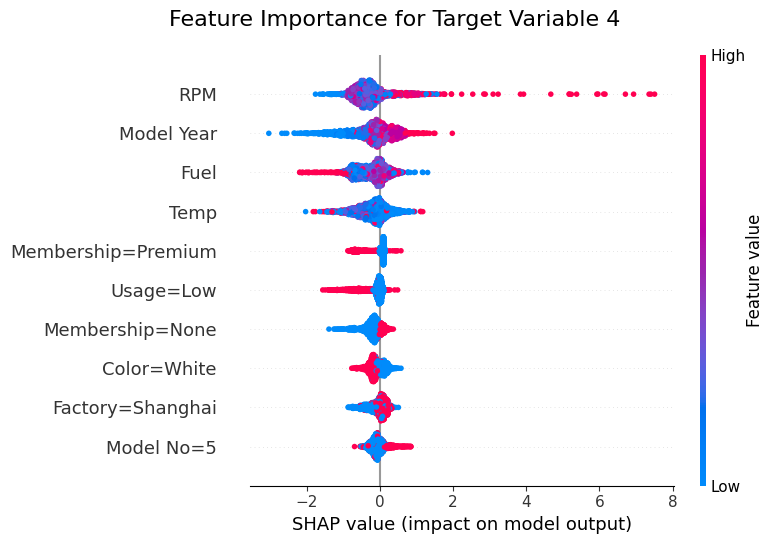

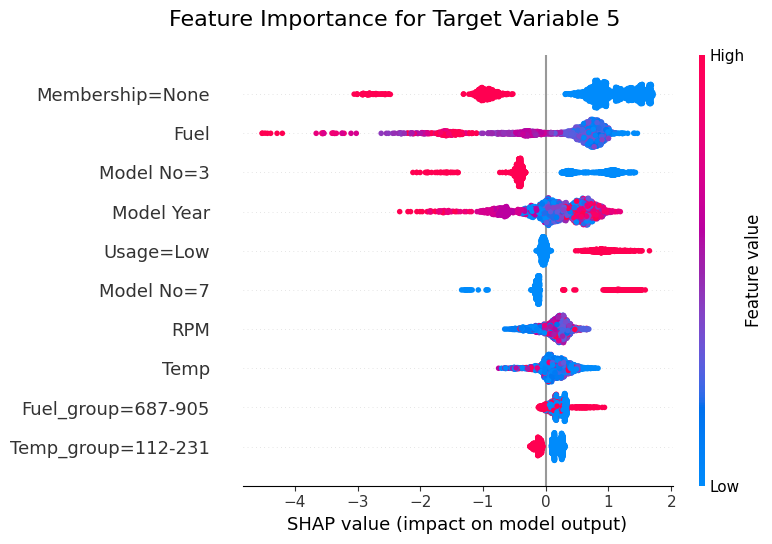

In [268]:
# Example function usage
clfr_type = 'multiclass'
chosen_model = 'XGB'
scoring = 'f1_macro'
feature_names_array = np.array(list(X3.columns))
idxs = feature_names_array
# xgb_f1_macro_model = pickle.load(open(chosen_model + '_' + str(scoring) + '_rs_cv_model.sav','rb'))
model_name = 'models/' + clfr_type + chosen_model + '_' + str(scoring) + '_rs_cv_model.sav'
xgb_f1_macro_model = pickle.loads(s3.Bucket(AWS_S3_BUCKET).Object(model_name).get()['Body'].read())
xgb_f1_macro_model_explainer = shap.TreeExplainer(xgb_f1_macro_model.best_estimator_.named_steps["clf"])
xgb_f1_macro_shap_values = xgb_f1_macro_model_explainer.shap_values(X_test)

plot_shap_summary(xgb_f1_macro_shap_values, X_test, feature_names_array)